# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones

#### Exploración y Curación de Datos - 2024

---

## Trabajo práctico entregable - Parte 1

### Integrantes

- Fernando Camino
- Emanuel Nicolás Herrador
- Juana Rapoport
- Sebastián Stutz
- Juan Ignacio Szurlewicz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as db
import missingno as msno
import logging as lg

sns.set_context('talk')

### Ejercicio 1: SQL

#### 1.1. Crear DB en SQLite

**Consigna**: Crear una base de datos en *SQLite* utilizando la librería [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

In [2]:
# Create db engine to connect to the database
engine = db.create_engine(url='sqlite:///melb_data.db', echo=True)

# Create connection to the engine
conn = engine.connect()

#### 1.2. Ingestar los datos

**Consigna**: Ingestar los datos provistos en https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv en una tabla y el dataset generado en clase con datos de airbnb y sus precios por código postal en otra.

In [3]:
# Important data for the project
data = {
    'melb': {
        'df': None,
        'url': 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv',
        'columns': None
    },
    'airbnb': {
        'df': None,
        'url': 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
        'columns': ['description', 'neighborhood_overview', 'street', 'neighborhood', 'city', 'suburb',
                    'state', 'zipcode', 'price', 'weekly_price', 'monthly_price', 'latitude', 'longitude']
    }
}

# Load data from the urls and connect to the database
for name, df in data.items():
    df['df'] = pd.read_csv(df['url'], usecols=df['columns']) if df['columns'] else pd.read_csv(df['url'])
    df['df'].to_sql(name, conn, if_exists='replace')

2024-05-19 10:44:34,968 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-05-19 10:44:34,972 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2024-05-19 10:44:34,973 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:44:34,974 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")
2024-05-19 10:44:34,975 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:44:34,976 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-05-19 10:44:34,976 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:44:34,978 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2024-05-19 10:44:34,978 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:44:34,979 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb")
2024-05-19 10:44:34,980 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:44:34,9

C:\Users\emanu\AppData\Local\Temp\ipykernel_12796\3932656488.py:18: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df['df'] = pd.read_csv(df['url'], usecols=df['columns']) if df['columns'] else pd.read_csv(df['url'])


2024-05-19 10:46:44,394 INFO sqlalchemy.engine.Engine [generated in 0.13663s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural stri

Corroboramos que los datos se hayan ingresado correctamente.

In [4]:
# Check the DataFrames loaded and the tables created
for name, df in data.items():
    print(f"Verifying {name} DataFrame")
    print(df['df'].head())
    print(f"Verifying {name} table")
    display(pd.read_sql_query(f"SELECT * FROM {name} LIMIT 5", conn))

Verifying melb DataFrame
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude        

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


Verifying airbnb DataFrame
                                         description  \
0  House: Clean, New, Modern, Quite, Safe. 10Km f...   
1  A large air conditioned room with queen spring...   
2  RIGHT IN THE HEART OF ST KILDA! It doesn't get...   
3  Comfortable, relaxed house, a home away from  ...   
4  We offer comfortable accommodation in Inner Me...   

                               neighborhood_overview  \
0       Very safe! Family oriented. Older age group.   
1  This hip area is a crossroads between two grea...   
2  A stay at our apartment means you can enjoy so...   
3  This is a great neighbourhood – it is quiet, y...   
4                                                NaN   

                           street   neighborhood          city  \
0         Bulleen, VIC, Australia   Balwyn North    Manningham   
1  Brunswick East, VIC, Australia      Brunswick      Moreland   
2        St Kilda, VIC, Australia       St Kilda  Port Phillip   
3       Thornbury, VIC, Australia  

,index,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0
3,3,"Comfortable, relaxed house, a home away from ...","This is a great neighbourhood – it is quiet, y...","Thornbury, VIC, Australia",Thornbury,Darebin,Thornbury,VIC,3071,-37.758971,144.989228,50,250.0,920.0
4,4,We offer comfortable accommodation in Inner Me...,None,"St Kilda East, VIC, Australia",St Kilda East,Port Phillip,St Kilda East,VIC,3183,-37.864530,144.992238,69,400.0,1900.0


#### 1.3. Consultas SQL

**Consigna**: Implementar consultas en SQL que respondan con la siguiente información:
- Cantidad de registros totales por ciudad.
- Cantidad de registros totales por barrio y ciudad.

##### Exploración de los datos

Para hacer estas consultas, primero nos fijemos cuáles son las columnas que hacen referencia a la ciudad y al barrio en cada uno de los datasets.

Por ello, veamos cuáles son las columnas que tiene cada uno.

In [5]:
for name, df in data.items():
    print(f"Columns in {name} DataFrame")
    print(df['df'].columns)

Columns in melb DataFrame
Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
Columns in airbnb DataFrame
Index(['description', 'neighborhood_overview', 'street', 'neighborhood',
       'city', 'suburb', 'state', 'zipcode', 'latitude', 'longitude', 'price',
       'weekly_price', 'monthly_price'],
      dtype='object')


Según lo que vemos, nuestros posibles *targets* son:
- Para el dataset de *Melbourne*: `Suburb`, `CouncilArea` y `Regionname`.
- Para el dataset de *Airbnb*: `city`, `suburb` y `neighborhood`.

Para ver bien cuál corresponde con cual, nos fijamos en sus intersecciones:

In [6]:
# Get the columns of interest
melb_cols = [data['melb']['df'][col] for col in ['Suburb', 'CouncilArea', 'Regionname']]
airbnb_cols = [data['airbnb']['df'][col] for col in ['city', 'suburb', 'neighborhood']]

# Check the unique values in the columns
for mcol in melb_cols:
    for acol in airbnb_cols:
        print(f"Intersection between {mcol.name} and {acol.name}")
        print(f"Length of {mcol.name} unique values: {len(mcol.dropna().unique())}")
        print(f"Length of {acol.name} unique values: {len(acol.dropna().unique())}")
        print(f"Intersection: {len(np.intersect1d(mcol.dropna(), acol.dropna()))}\n")

Intersection between Suburb and city
Length of Suburb unique values: 314
Length of city unique values: 30
Intersection: 5

Intersection between Suburb and suburb
Length of Suburb unique values: 314
Length of suburb unique values: 542
Intersection: 296

Intersection between Suburb and neighborhood
Length of Suburb unique values: 314
Length of neighborhood unique values: 59
Intersection: 51

Intersection between CouncilArea and city
Length of CouncilArea unique values: 33
Length of city unique values: 30
Intersection: 30

Intersection between CouncilArea and suburb
Length of CouncilArea unique values: 33
Length of suburb unique values: 542
Intersection: 6

Intersection between CouncilArea and neighborhood
Length of CouncilArea unique values: 33
Length of neighborhood unique values: 59
Intersection: 0

Intersection between Regionname and city
Length of Regionname unique values: 8
Length of city unique values: 30
Intersection: 0

Intersection between Regionname and suburb
Length of Regionn

Por lo que se ve claramente que las relaciones son:
- `Melb Suburb` $\Leftrightarrow$ `Airbnb suburb` $\Leftrightarrow$ `Airbnb neighborhood`
- `Melb CouncilArea` $\Leftrightarrow$ `Airbnb city`

##### Consultas

Luego, por ello, nuestras consultas van a ser las siguientes:

In [7]:
# Write the queries
f_query = lambda x, y: f"""
SELECT {x}, COUNT(*) as Count
FROM {y}
GROUP BY {x}
ORDER BY Count DESC
"""

queries = [
    f_query('CouncilArea', 'melb'),
    f_query('city', 'airbnb'),
    f_query('Suburb, CouncilArea', 'melb'),
    f_query('suburb, city', 'airbnb')
]

# Execute the queries
for query in queries:
    print("Executing query")
    result = pd.read_sql_query(query, conn)
    display(result)

Executing query
2024-05-19 10:46:45,157 INFO sqlalchemy.engine.Engine 
SELECT CouncilArea, COUNT(*) as Count
FROM melb
GROUP BY CouncilArea
ORDER BY Count DESC

2024-05-19 10:46:45,158 INFO sqlalchemy.engine.Engine [raw sql] ()


,CouncilArea,Count
0,None,1369
1,Moreland,1163
2,Boroondara,1160
3,Moonee Valley,997
4,Darebin,934
5,Glen Eira,848
6,Stonnington,719
7,Maribyrnong,692
8,Yarra,647
9,Port Phillip,628


Executing query
2024-05-19 10:46:45,173 INFO sqlalchemy.engine.Engine 
SELECT city, COUNT(*) as Count
FROM airbnb
GROUP BY city
ORDER BY Count DESC

2024-05-19 10:46:45,174 INFO sqlalchemy.engine.Engine [raw sql] ()


,city,Count
0,Melbourne,7368
1,Port Phillip,2808
2,Yarra,2049
3,Stonnington,1621
4,Moreland,967
5,Yarra Ranges,771
6,Darebin,698
7,Boroondara,664
8,Glen Eira,631
9,Whitehorse,614


Executing query
2024-05-19 10:46:45,220 INFO sqlalchemy.engine.Engine 
SELECT Suburb, CouncilArea, COUNT(*) as Count
FROM melb
GROUP BY Suburb, CouncilArea
ORDER BY Count DESC

2024-05-19 10:46:45,220 INFO sqlalchemy.engine.Engine [raw sql] ()


,Suburb,CouncilArea,Count
0,Reservoir,Darebin,323
1,Richmond,Yarra,251
2,Bentleigh East,Glen Eira,234
3,Preston,Darebin,228
4,Brunswick,Moreland,208
...,...,...,...
596,Williamstown North,None,1
597,Wonga Park,Manningham,1
598,Wyndham Vale,None,1
599,Yallambie,None,1


Executing query
2024-05-19 10:46:45,235 INFO sqlalchemy.engine.Engine 
SELECT suburb, city, COUNT(*) as Count
FROM airbnb
GROUP BY suburb, city
ORDER BY Count DESC

2024-05-19 10:46:45,236 INFO sqlalchemy.engine.Engine [raw sql] ()


,suburb,city,Count
0,Melbourne,Melbourne,3850
1,Southbank,Melbourne,1190
2,Saint Kilda,Port Phillip,802
3,South Yarra,Stonnington,790
4,Docklands,Melbourne,612
...,...,...,...
687,st kilda,Port Phillip,1
688,墨尔本,Glen Eira,1
689,墨尔本,Wyndham,1
690,墨爾本 Melbourne,Melbourne,1


#### 1.4. Combinar datasets

**Consigna**: Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase.

Para este punto, vamos a considerar el dataset con el que se trabajó en clase, es decir, el *transformado* de airbnb para evitar la "explosión" de datos que generaría hacer un join con el original.

Por ello, realizamos las siguientes transformaciones para nuestro nuevo dataset:

In [8]:
# Copy the airbnb dataset
data['airbnb_nw'] = { 'df': data['airbnb']['df'].copy() }

# Standardize the zipcode data type
data['airbnb_nw']['df']['zipcode'] = pd.to_numeric(data['airbnb_nw']['df']['zipcode'], errors='coerce')
data['airbnb_nw']['df']['zipcode_int'] = data['airbnb_nw']['df']['zipcode'].fillna(0).astype('int')

# Group the data by zipcode
col = ['price', 'weekly_price', 'monthly_price', 'zipcode']
data['airbnb_nw']['df'] = data['airbnb_nw']['df'][col].groupby('zipcode')\
    .agg(airbnb_record_count=('price', 'count'),
        airbnb_price_mean=('price', 'mean'),
        airbnb_weekly_price_mean=('weekly_price', 'mean'),
        airbnb_monthly_price_mean=('monthly_price', 'mean'))\
    .reset_index()

# Add the data to the database
data['airbnb_nw']['df'].to_sql('airbnb_nw', conn, if_exists='replace', index=False)

# Print the head of the new table
print("Verifying airbnb_nw table")
display(pd.read_sql_query("SELECT * FROM airbnb_nw LIMIT 5", conn))

2024-05-19 10:46:45,328 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb_nw")
2024-05-19 10:46:45,329 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:46:45,330 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("airbnb_nw")
2024-05-19 10:46:45,330 INFO sqlalchemy.engine.Engine [raw sql] ()
2024-05-19 10:46:45,332 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb_nw (
	zipcode FLOAT, 
	airbnb_record_count BIGINT, 
	airbnb_price_mean FLOAT, 
	airbnb_weekly_price_mean FLOAT, 
	airbnb_monthly_price_mean FLOAT
)


2024-05-19 10:46:45,332 INFO sqlalchemy.engine.Engine [no key 0.00045s] ()
2024-05-19 10:46:45,341 INFO sqlalchemy.engine.Engine INSERT INTO airbnb_nw (zipcode, airbnb_record_count, airbnb_price_mean, airbnb_weekly_price_mean, airbnb_monthly_price_mean) VALUES (?, ?, ?, ?, ?)
2024-05-19 10:46:45,342 INFO sqlalchemy.engine.Engine [generated in 0.00191s] [(2010.0, 1, 40.0, None, None), (2134.0, 1, 50.0, None, None), (2582.0, 1, 104.0, None, None), (3000.0, 33

,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,2010.0,1,40.000000,NaN,NaN
1,2134.0,1,50.000000,NaN,NaN
2,2582.0,1,104.000000,NaN,NaN
3,3000.0,3367,150.504307,918.738956,3407.204651
4,3001.0,2,132.500000,NaN,NaN


Teniendo ya el dataset con el que se trabajó en clase, vamos a hacer el *Join* con el dataset de *Melbourne* con SQL como se nos pide en la consigna. Para ello, hacemos:

In [9]:
# Write the join query
join_query = """
SELECT *
FROM melb
LEFT JOIN airbnb_nw
    ON melb.Postcode = airbnb_nw.zipcode
"""

# Execute the join query
print("Executing join query")
result = pd.read_sql_query(join_query, conn)
display(result)

Executing join query
2024-05-19 10:46:45,362 INFO sqlalchemy.engine.Engine 
SELECT *
FROM melb
LEFT JOIN airbnb_nw
    ON melb.Postcode = airbnb_nw.zipcode

2024-05-19 10:46:45,362 INFO sqlalchemy.engine.Engine [raw sql] ()


,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,3067.0,258.0,130.624031,605.152174,2187.032258
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,3067.0,258.0,130.624031,605.152174,2187.032258
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,3067.0,258.0,130.624031,605.152174,2187.032258
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,3067.0,258.0,130.624031,605.152174,2187.032258
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,3067.0,258.0,130.624031,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,...,None,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,3150.0,189.0,124.026455,526.350000,1901.611111
13576,13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,...,None,-37.85927,144.87904,Western Metropolitan,6380.0,3016.0,74.0,191.094595,612.250000,2119.750000
13577,13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,...,None,-37.85274,144.88738,Western Metropolitan,6380.0,3016.0,74.0,191.094595,612.250000,2119.750000
13578,13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,...,None,-37.85908,144.89299,Western Metropolitan,6380.0,3016.0,74.0,191.094595,612.250000,2119.750000


### Ejercicio 2: Pandas

#### 2.1. Selección de columnas y filtrado de datos

**Consigna**: Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
- Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

Para este punto, primero analicemos los valores faltantes que tenemos en nuestro dataset y cuántos de ellos se encuentran en cada columna.

<Axes: >

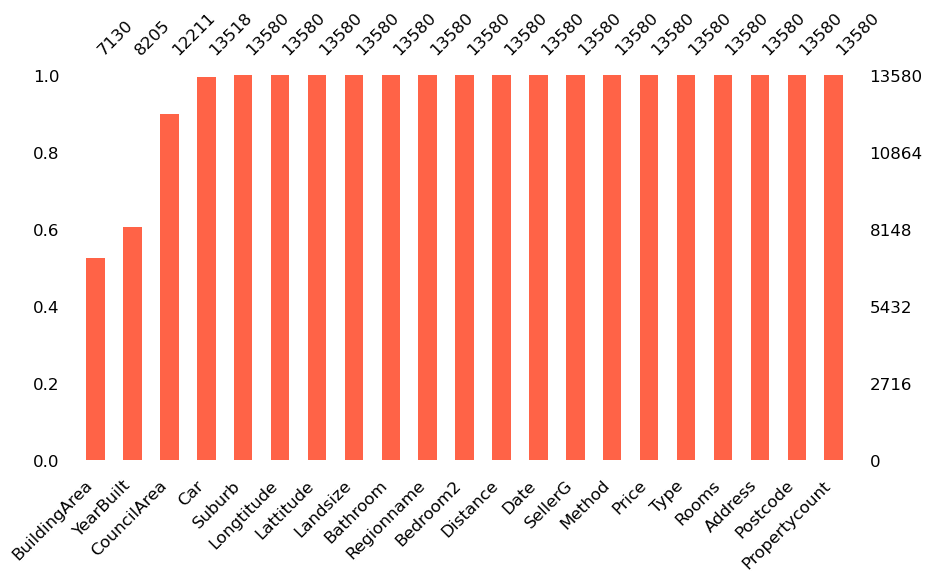

In [10]:
# Plot missing values bar
msno.bar(df=data['melb']['df'], color='tomato', sort='ascending', figsize=(10, 5), fontsize=12)

Luego, queda bastante claro y evidente que vamos a tratar de evitar las columnas `BuildingArea` y `YearBuilt` debido a la gran cantidad de valores faltantes que presentan.

Respecto a las columnas elegidas, consideramos que aquellas que nos van a ayudar y aportan más información a la predicción del valor de la propiedad son:
- `Price`: Precio de la propiedad en dólares.
- `Bedrooms2`: Cantidad de dormitorios.
- `Type`: Tipo de propiedad (br: dormitorio; h: casa; u: unidad; t: casa adosada; res: otro residencial).
- `Rooms`: Cantidad de habitaciones en la propiedad.
- `Car`: Cantidad de cocheras.
- `Landsize`: Tamaño del terreno en metros cuadrados.
- `Regionname`: Región en la que se encuentra la propiedad.

Por ello, vamos a tener que realizar la limpieza de los datos para cada uno de estos casos. Veamos sus distribuciones y valores extremos.

Vamos a considerar las siguientes funciones y valores de utilidad para trabajar:

In [11]:
def box_plot_simple(data, x, title, xlabel, ylabel, ax, tick_diff = None):
    g = sns.boxplot(x=x, data=data, ax=ax, color='orange', fliersize = 5, \
        showmeans = True, meanprops = {'marker': '.', 'markerfacecolor': 'black', 'markeredgecolor': 'black'})
    g.set_title(title)
    g.set_xlabel(xlabel)
    g.set_ylabel(ylabel)

    if tick_diff:
        g.set_xticks(np.arange(0, data[x].max() + tick_diff, tick_diff))
        x_labels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
        g.set_xticklabels(x_labels)

    return g

def kde_plot(data, x, title, xlabel, ax, tick_diff = None):
    g = sns.kdeplot(data[x], ax=ax, color='orange', fill=True)
    g.set_title(title)
    g.set_xlabel(xlabel)
    g.set_ylabel('Density')

    if tick_diff:
        g.set_xticks(np.arange(0, data[x].max() + tick_diff, tick_diff))
        x_labels = ['{:,.0f}'.format(x) + 'K' for x in g.get_xticks()/1000]
        g.set_xticklabels(x_labels)

    return g

def hist_plot(data, x, title, xlabel, ylabel, ax, kde=False):
    g = sns.histplot(data[x], ax=ax, color='orange', kde=kde, bins=20)
    g.set_title(title)
    g.set_xlabel(xlabel)
    g.set_ylabel(ylabel)

    return g

# Copy the data
df_melb = data['melb']['df'].copy()

##### Precio

Veamos la distribución de los precios para ver si hay valores extremos.

DESCRIBE melb DataFrame


,index,Price
0,count,13580.00
1,mean,1075684.08
2,std,639310.72
3,min,85000.00
4,25%,650000.00
5,50%,903000.00
6,75%,1330000.00
7,max,9000000.00


c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


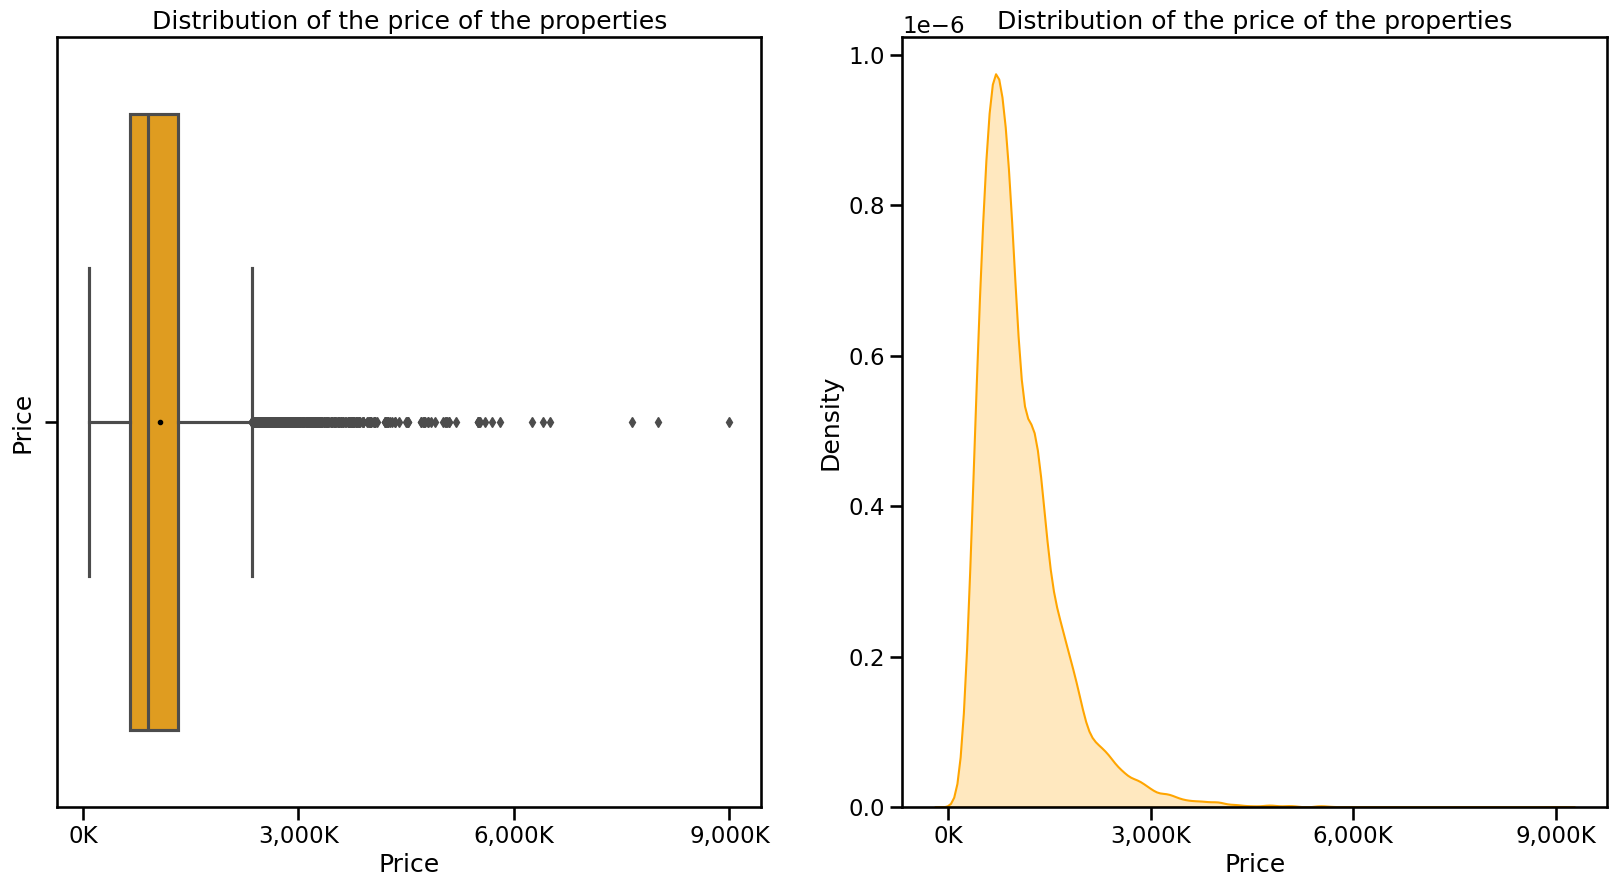

In [12]:
# DESCRIBE the data
print("DESCRIBE melb DataFrame")
display(df_melb['Price'].describe().apply(lambda x: format(x, '.2f')).reset_index())

# GRAPH: Distribution of the price of the properties with BOXPLOT and KDEPLOT
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Boxplot
g = box_plot_simple(data=df_melb, x='Price', title='Distribution of the price of the properties', \
    xlabel='Price', ylabel='Price', ax=ax[0], tick_diff=3_000_000)

# KDEplot
g = kde_plot(data=df_melb, x='Price', title='Distribution of the price of the properties', \
    xlabel='Price', ax=ax[1], tick_diff=3_000_000)

Luego, como puede notarse claramente, existen valores muy lejanos que son *outliers* y podemos descartar dado que al ser pocos y muy grandes respecto al resto de los datos, no aportan información relevante para la predicción y nos pueden llegar a sesgar los resultados.
Para ello, vamos a quedarnos con el $98\%$ de valores más chicos (i.e., menores al percentil $98$) y descartar el $2\%$ restante.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


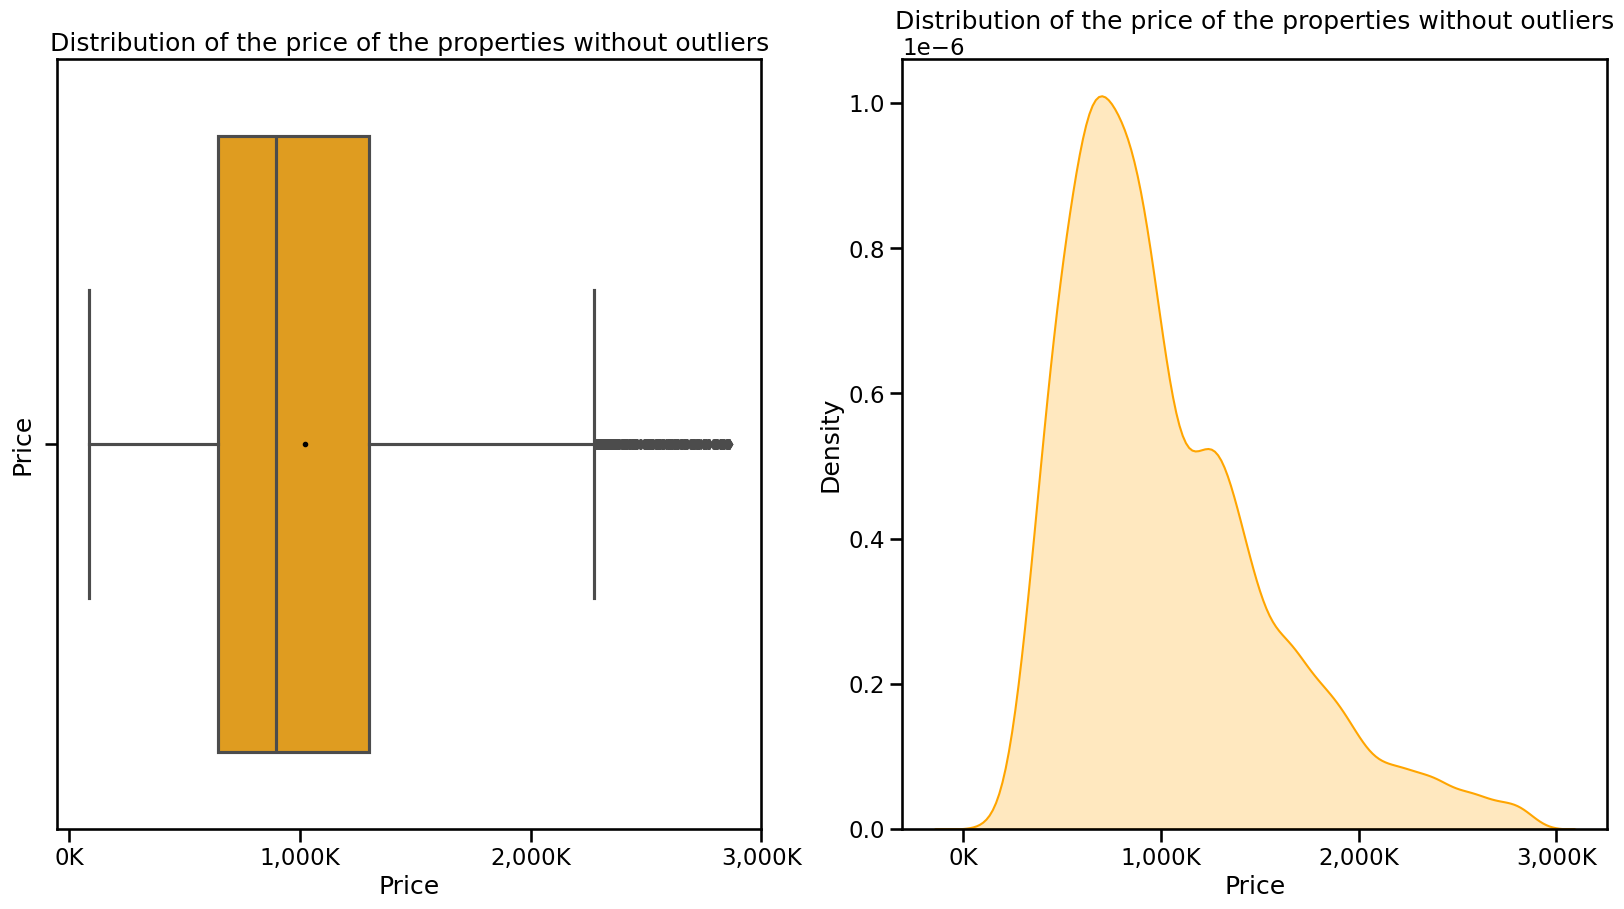

In [13]:
# Remove the outliers
q98 = df_melb['Price'].quantile(0.98)
df_melb_clean = df_melb[df_melb['Price'] < q98]

# Graph the distribution of the price of the properties without outliers
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb_clean, x='Price', title='Distribution of the price of the properties without outliers', \
    xlabel='Price', ylabel='Price', ax=ax[0], tick_diff=1_000_000)
kde_plot(data=df_melb_clean, x='Price', title='Distribution of the price of the properties without outliers', \
    xlabel='Price', ax=ax[1], tick_diff=1_000_000)
plt.show()

In [14]:
# Set the new data
df_melb = df_melb_clean

##### Cantidad de habitaciones

De forma análoga a lo anterior, veamos cómo se distribuyen las cantidades de habitaciones.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


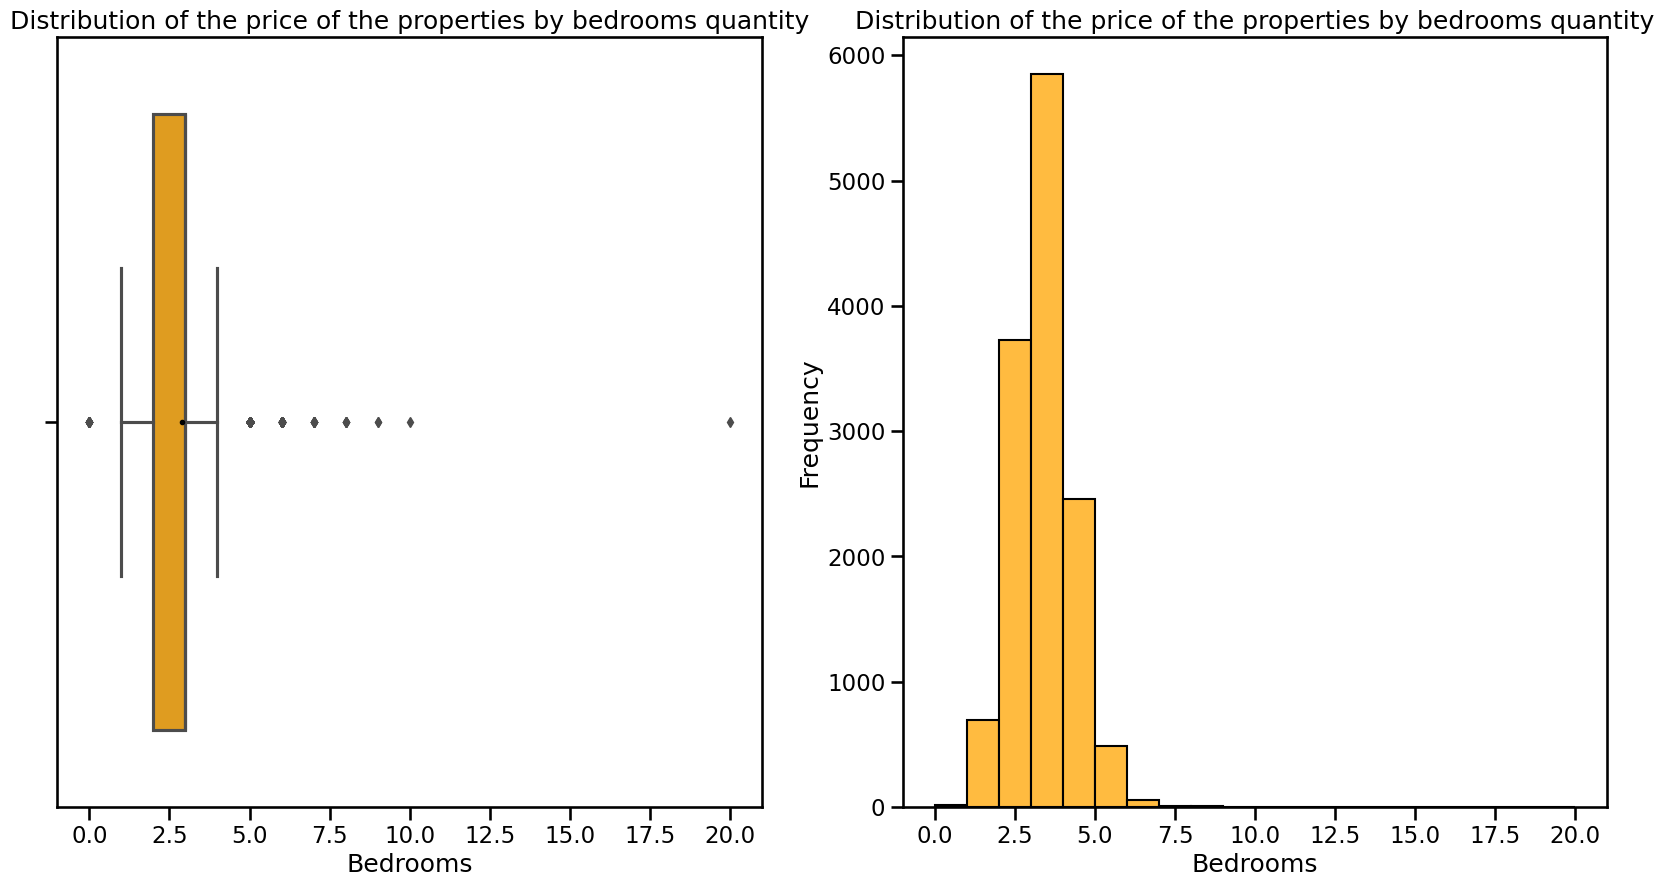

In [15]:
# GRAPH: Distribution of the price of the properties by bedrooms quantity
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb, x='Bedroom2', title='Distribution of the price of the properties by bedrooms quantity', \
    xlabel='Bedrooms', ylabel='', ax=ax[0])
hist_plot(data=df_melb, x='Bedroom2', title='Distribution of the price of the properties by bedrooms quantity', \
    xlabel='Bedrooms', ylabel='Frequency', ax=ax[1])
plt.show()

Análogamente a antes, vamos a quedarnos con el $99\%$ de valores más chicos para descartar valores grandes como el que representa $20$ dormitorios.

Además, el valor $0$ lo vamos a conservar dado que una casa puede no tener dormitorios.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


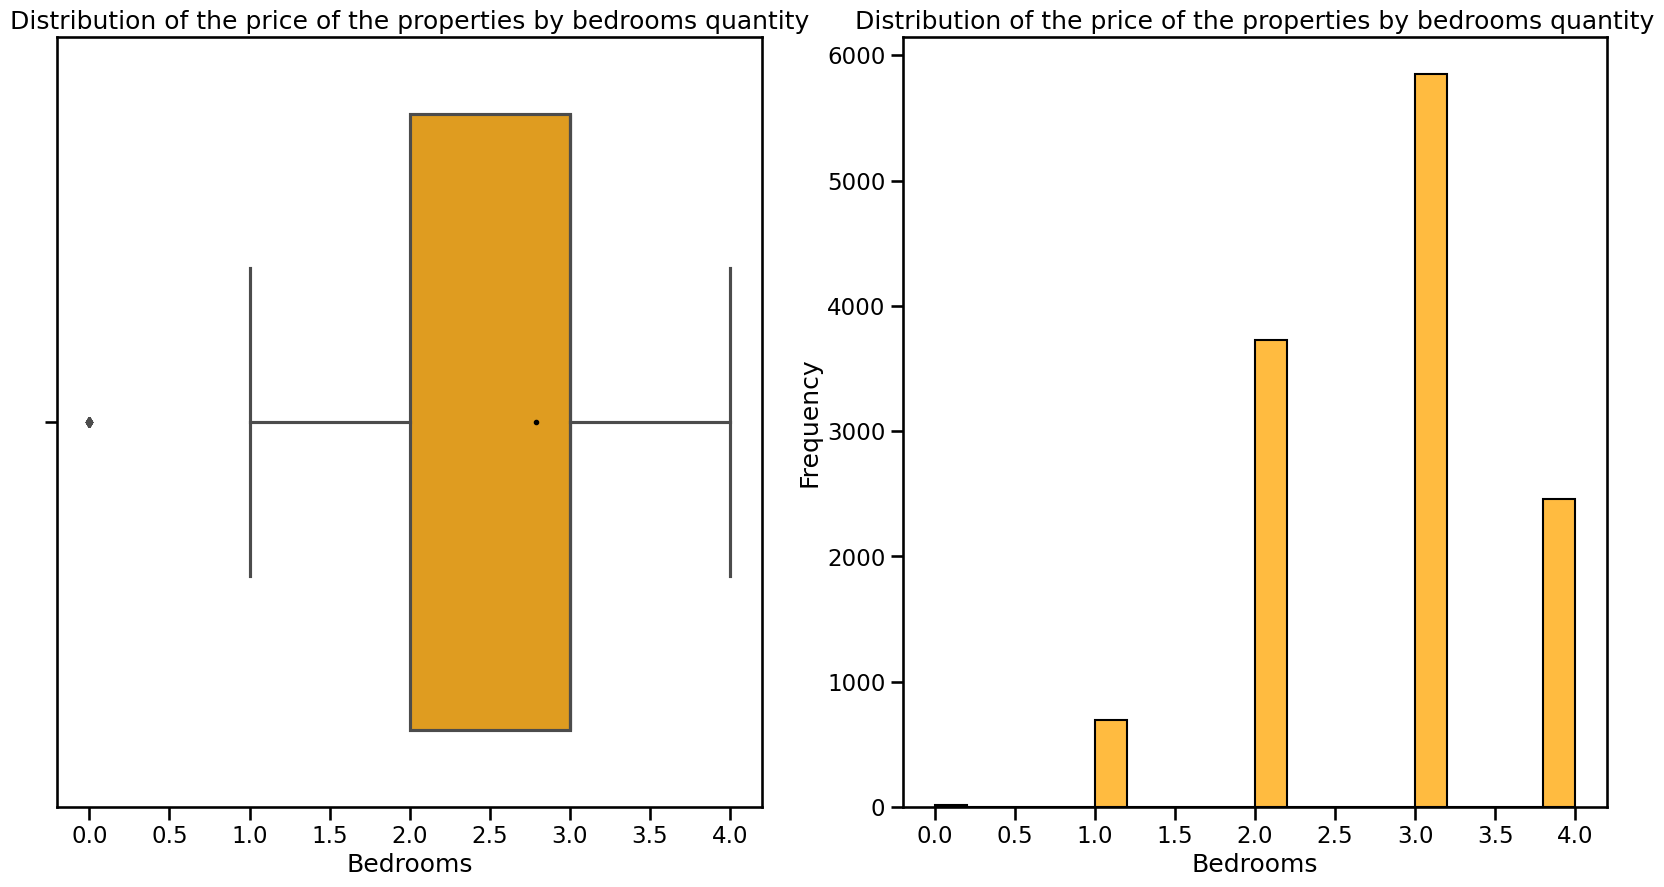

In [16]:
q99 = df_melb['Bedroom2'].quantile(0.98)
df_melb_clean = df_melb[df_melb['Bedroom2'] < q99]

# GRAPH: Distribution of the price of the properties by bedrooms quantity
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb_clean, x='Bedroom2', title='Distribution of the price of the properties by bedrooms quantity', \
    xlabel='Bedrooms', ylabel='', ax=ax[0])
hist_plot(data=df_melb_clean, x='Bedroom2', title='Distribution of the price of the properties by bedrooms quantity', \
    xlabel='Bedrooms', ylabel='Frequency', ax=ax[1])
plt.show()

In [17]:
df_melb = df_melb_clean

##### Tipo de propiedad

Simplemente podemos observar los datos, pero en este caso no tendríamos nada que filtrar como valor extremo.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


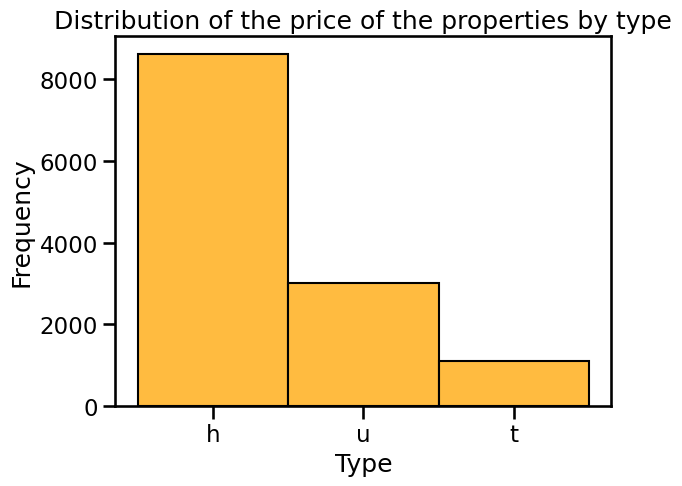

In [18]:
hist_plot(data=df_melb, x='Type', title='Distribution of the price of the properties by type', \
    xlabel='Type', ylabel='Frequency', ax=plt.gca())
plt.show()

##### Cantidad de habitaciones (piezas)

El procedimiento es análogo que con *Bedrooms2*, pero no visualizaríamos algún *outlier* importante a filtrar para que no afecte a la predicción.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


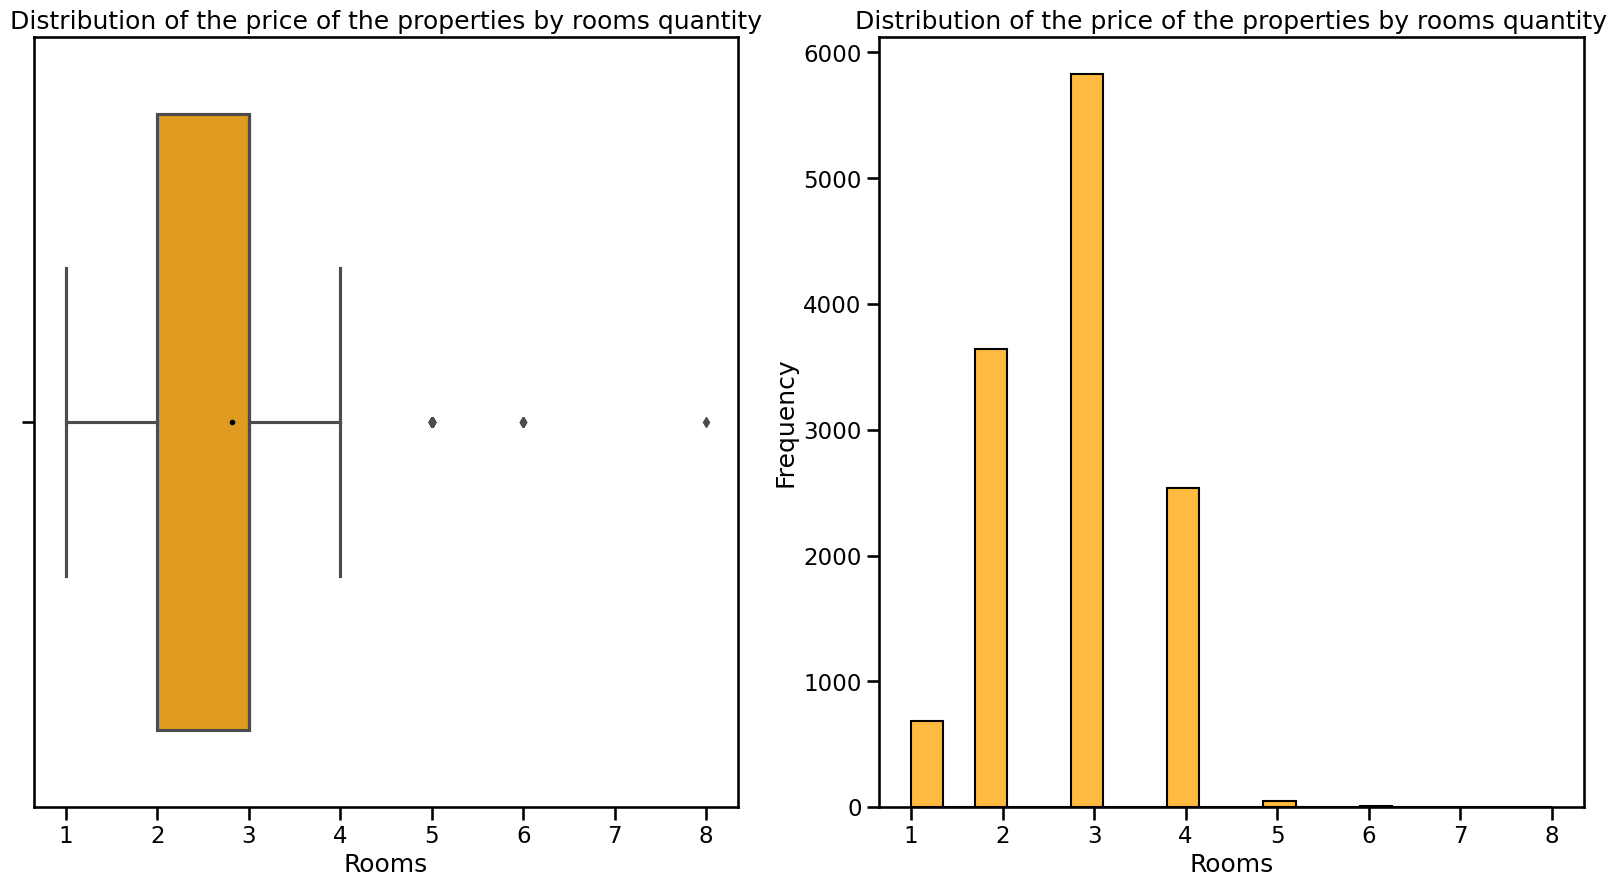

In [19]:
# GRAPH: Distribution of the price of the properties by rooms quantity
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb, x='Rooms', title='Distribution of the price of the properties by rooms quantity', \
    xlabel='Rooms', ylabel='', ax=ax[0])
hist_plot(data=df_melb, x='Rooms', title='Distribution of the price of the properties by rooms quantity', \
    xlabel='Rooms', ylabel='Frequency', ax=ax[1])
plt.show()

##### Cantidad de cocheras

Tenemos la siguiente distribución:

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


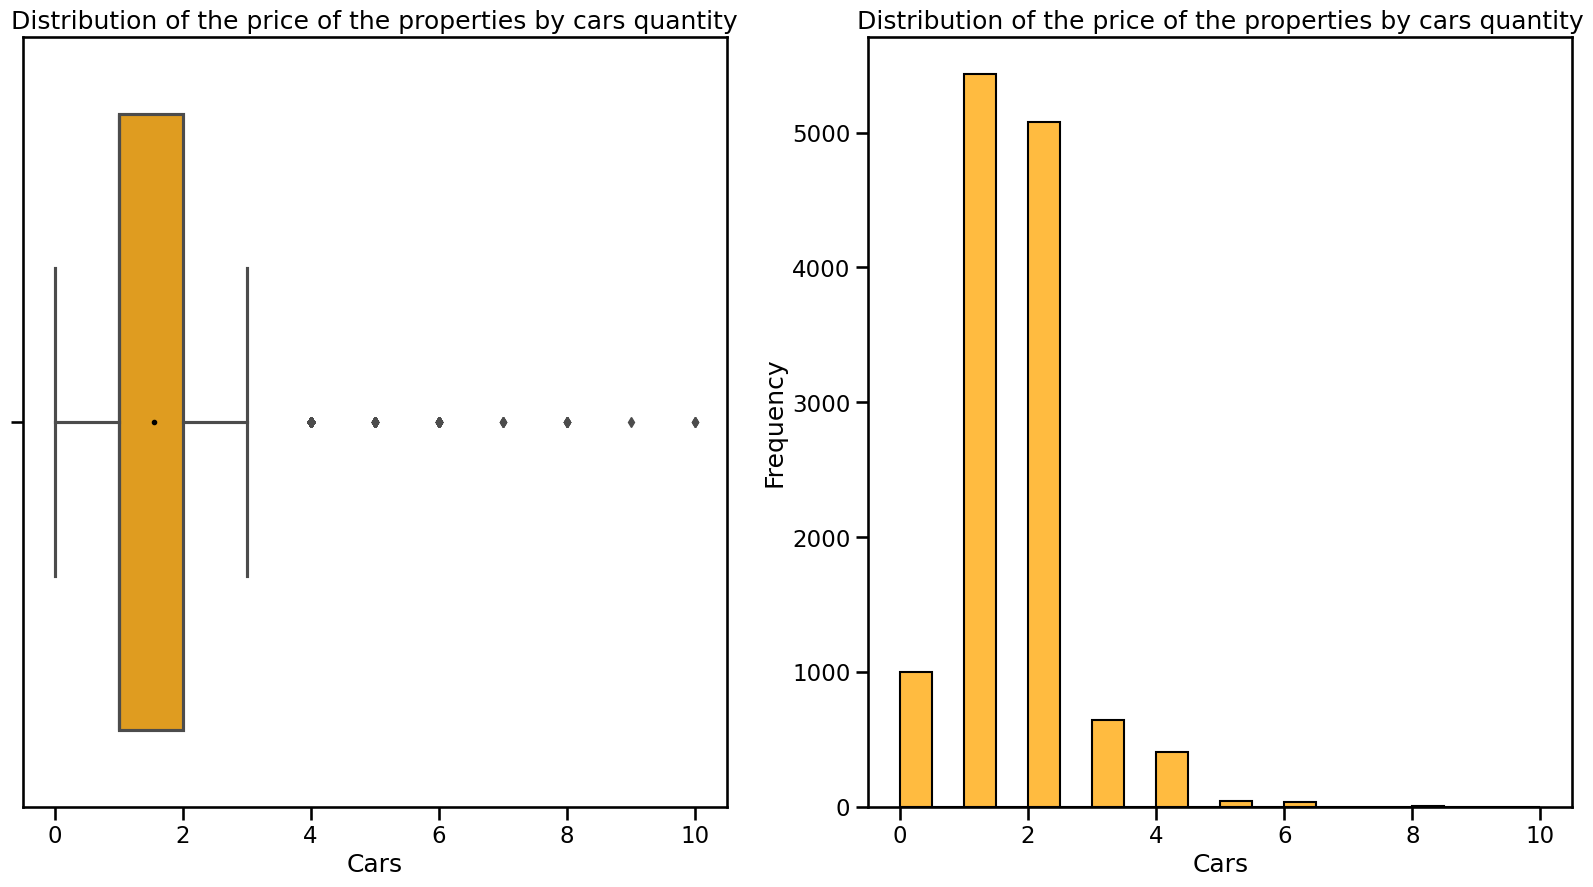

In [20]:
# GRAPH: Distribution of the price of the properties by cars quantity
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb, x='Car', title='Distribution of the price of the properties by cars quantity', \
    xlabel='Cars', ylabel='', ax=ax[0])
hist_plot(data=df_melb, x='Car', title='Distribution of the price of the properties by cars quantity', \
    xlabel='Cars', ylabel='Frequency', ax=ax[1])
plt.show()

Y notamos que hay valores extremos con una gran cantidad de cocheras pero que no vamos a considerar dado que, como se puede ver a continuación, se muestra que hay más cocheras que habitaciones en las propiedades *outlier*.

Por ello, sacamos el percentil $99$ para quedarnos con el $99\%$ de los valores más chicos.

In [21]:
df_melb[df_melb['Car'] >= 7][['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Price']]

,Rooms,Bedroom2,Bathroom,Car,Price
476,3,3.0,2.0,8.0,850000.0
2941,4,4.0,2.0,8.0,1000000.0
3146,4,4.0,2.0,7.0,2610000.0
3940,4,4.0,3.0,8.0,1900000.0
4508,3,4.0,1.0,8.0,1500000.0
7297,3,3.0,2.0,7.0,560000.0
7416,4,4.0,2.0,7.0,820500.0
8166,4,4.0,1.0,8.0,1822000.0
8963,3,3.0,1.0,9.0,2100000.0
9423,4,4.0,1.0,10.0,925000.0


c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


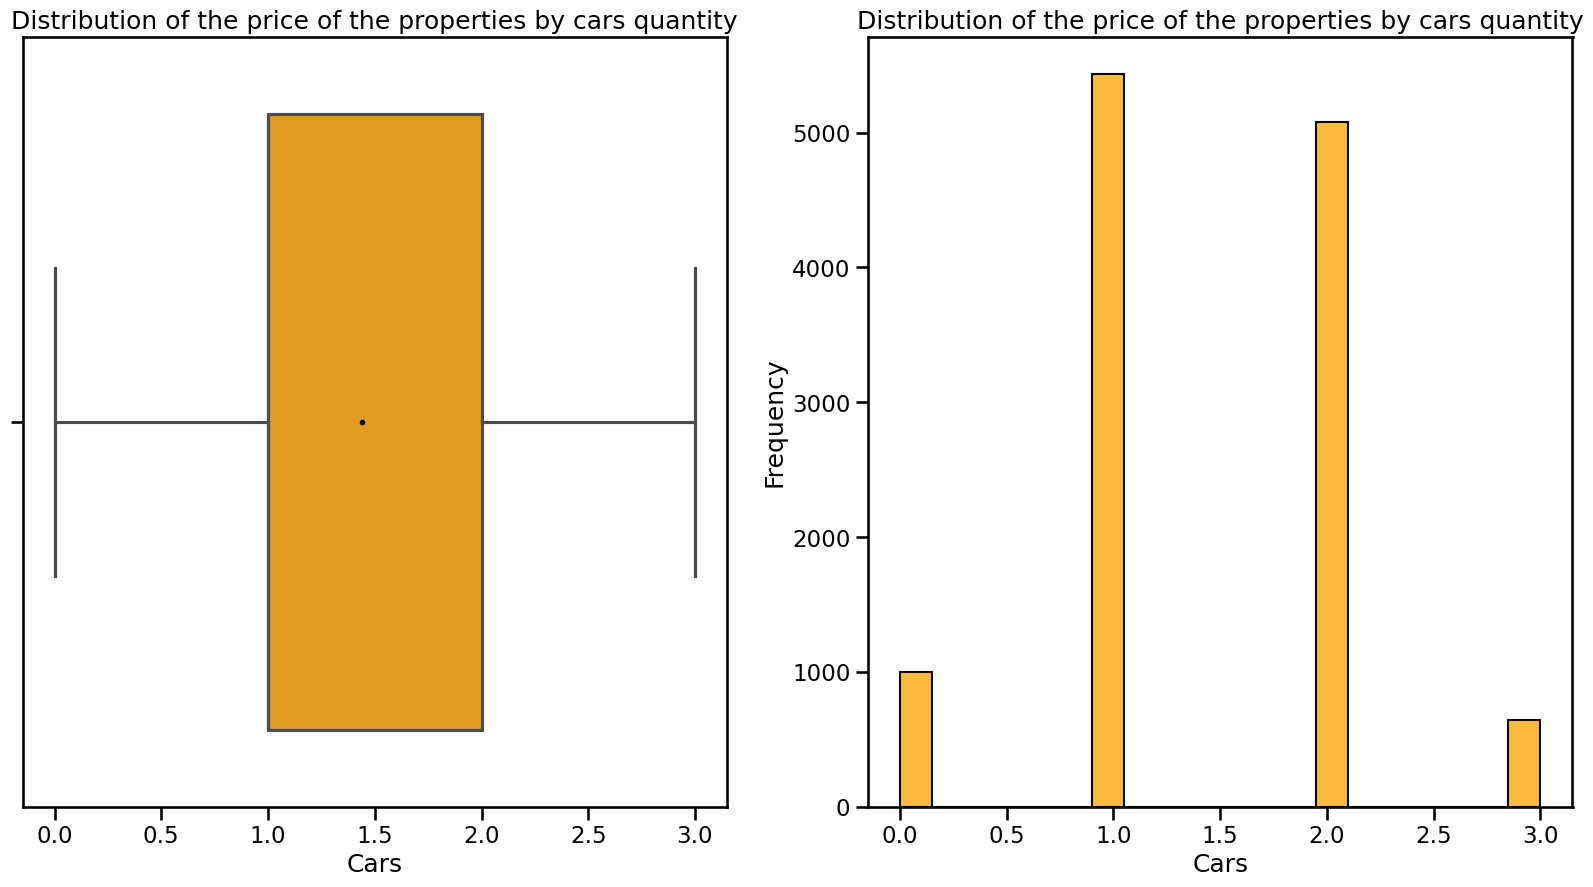

In [22]:
q99 = df_melb['Car'].quantile(0.99)
df_melb_clean = df_melb[df_melb['Car'] < q99]

# GRAPH: Distribution of the price of the properties by cars quantity
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb_clean, x='Car', title='Distribution of the price of the properties by cars quantity', \
    xlabel='Cars', ylabel='', ax=ax[0])
hist_plot(data=df_melb_clean, x='Car', title='Distribution of the price of the properties by cars quantity', \
    xlabel='Cars', ylabel='Frequency', ax=ax[1])
plt.show()

In [23]:
df_melb = df_melb_clean

##### Tamaño del terreno

Para el caso de los tamaños de los terrenos, notemos que la distribución de estos datos es la siguiente:

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


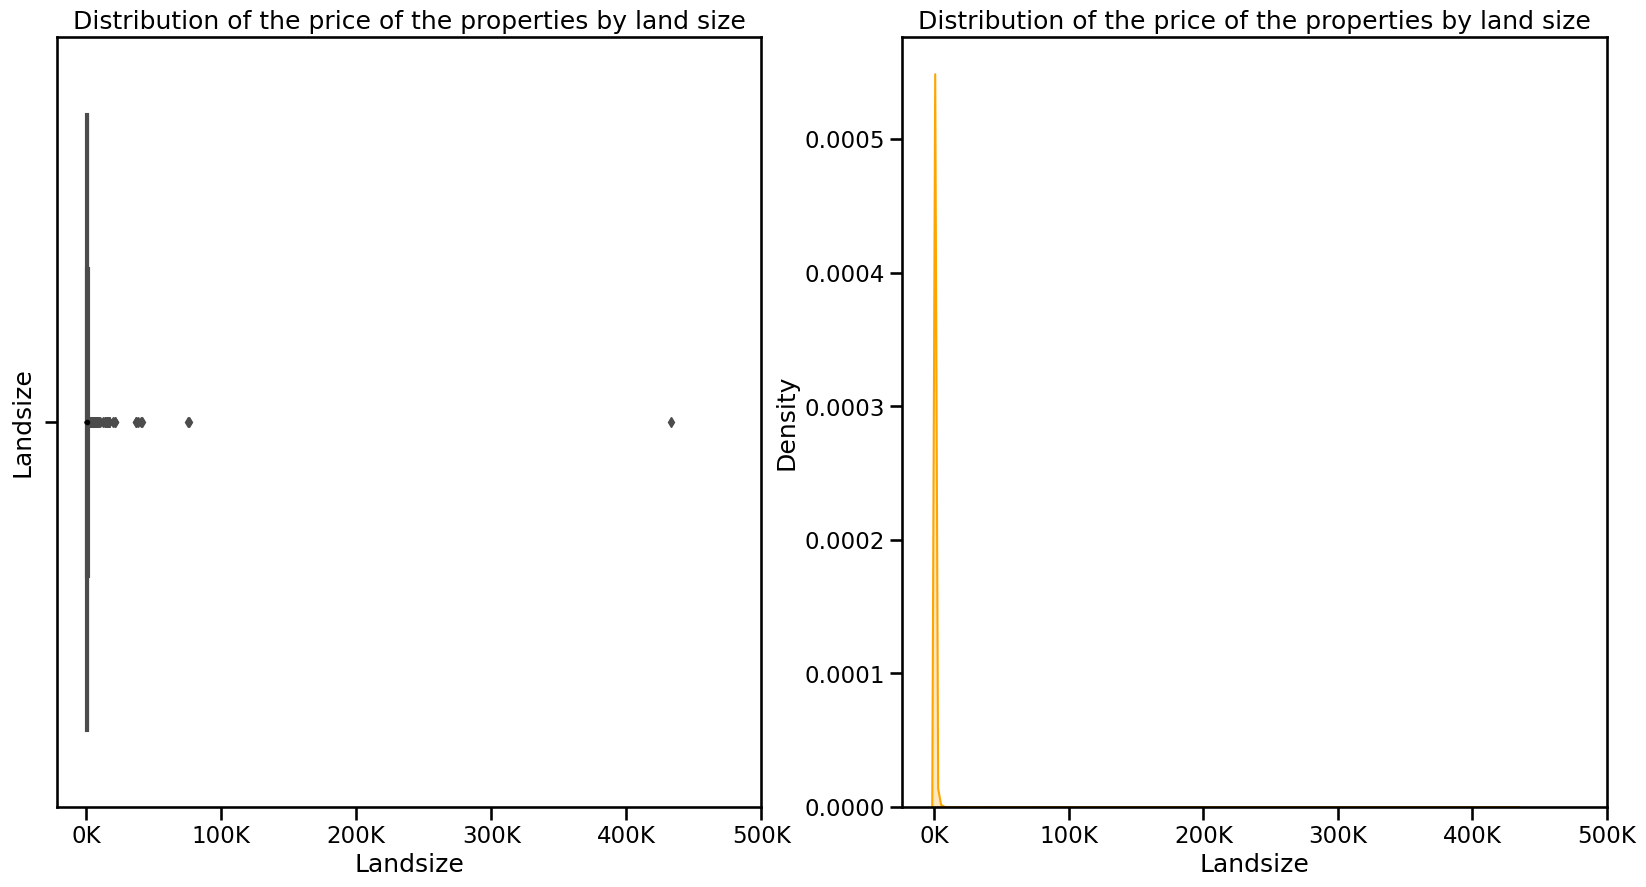

In [24]:
# GRAPH: Distribution of the price of the properties by land size
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb, x='Landsize', title='Distribution of the price of the properties by land size', \
    xlabel='Landsize', ylabel='Landsize', ax=ax[0], tick_diff=100_000)
kde_plot(data=df_melb, x='Landsize', title='Distribution of the price of the properties by land size', \
    xlabel='Landsize', ax=ax[1], tick_diff=100_000)
plt.show()

Por lo que puede notarse una fuerte presencia del outlier con valor máximo y gran diferencia respecto a los demás. Utilizamos nuevamente el percentil $99$ para quedarnos con el $99\%$ de los valores más chicos.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


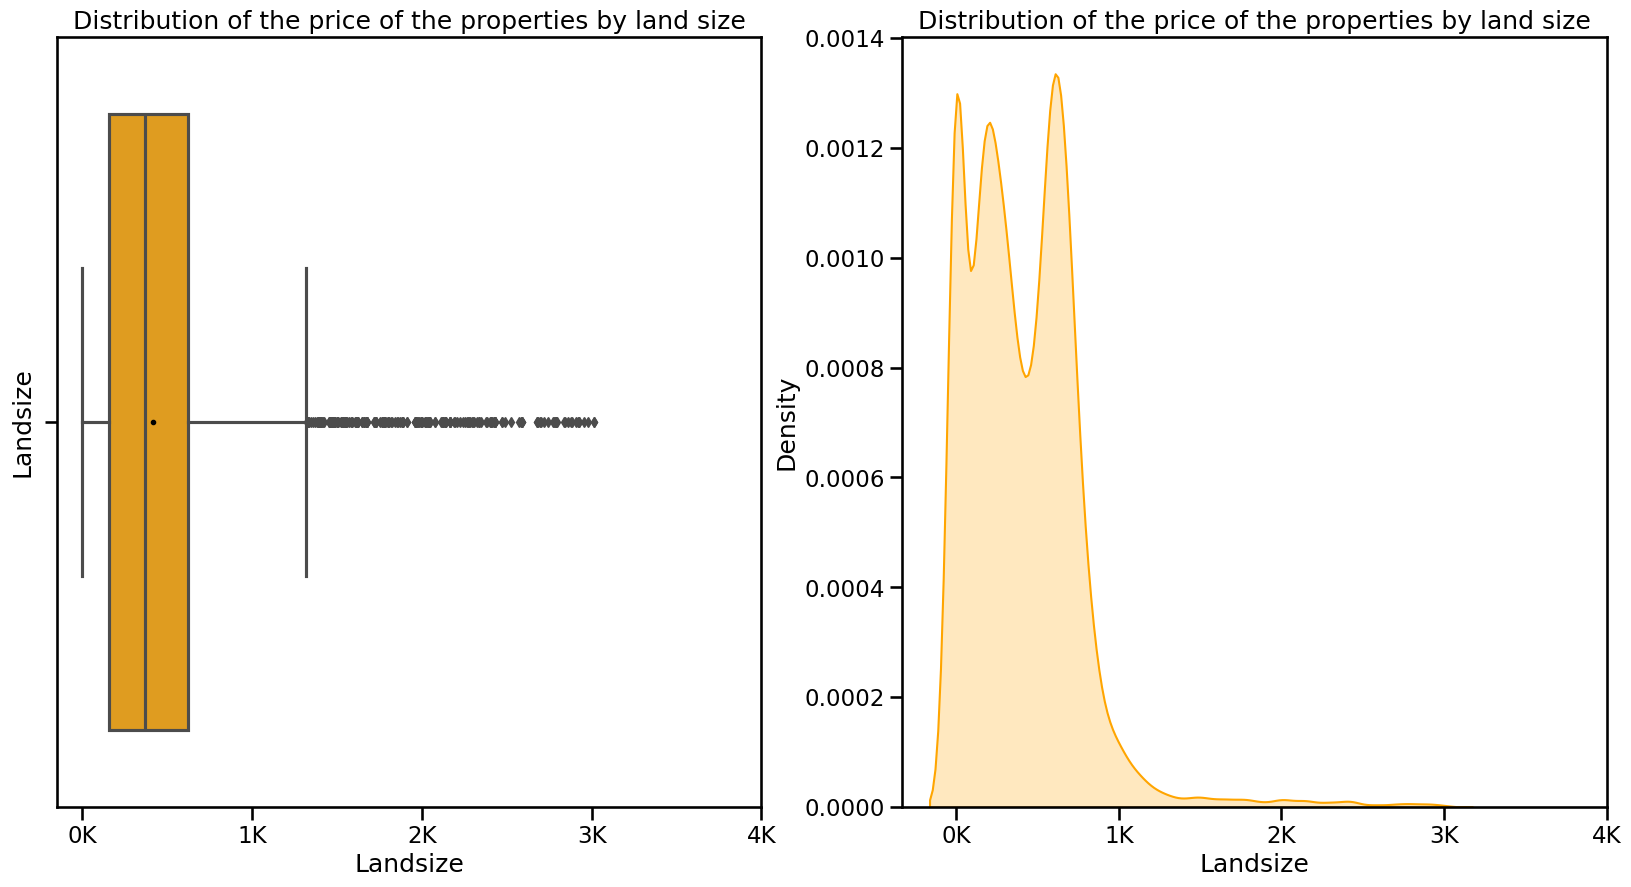

In [25]:
q99 = df_melb['Landsize'].quantile(0.99)
df_melb_clean = df_melb[df_melb['Landsize'] < q99]

# GRAPH: Distribution of the price of the properties by land size
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
box_plot_simple(data=df_melb_clean, x='Landsize', title='Distribution of the price of the properties by land size', \
    xlabel='Landsize', ylabel='Landsize', ax=ax[0], tick_diff=1_000)
kde_plot(data=df_melb_clean, x='Landsize', title='Distribution of the price of the properties by land size', \
    xlabel='Landsize', ax=ax[1], tick_diff=1_000)
plt.show()

Asimismo, notamos que hay muchos valores iguales y/o cercanos a $0$ respecto a los tamaños de los terrenos, lo cual tiene sentido dado que no todas las propiedades tienen terreno (pej., si es un apartamento no es *tu* terreno sino el del edificio). Por ello, vamos a conservar estos valores.

In [26]:
df_melb = df_melb_clean

##### Región

Simplemente a fines de ver su distribución, vemos cuántas propiedades hay en cada región.

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\emanu\AppData\Local\Temp\ipykernel_12796\1447439519.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


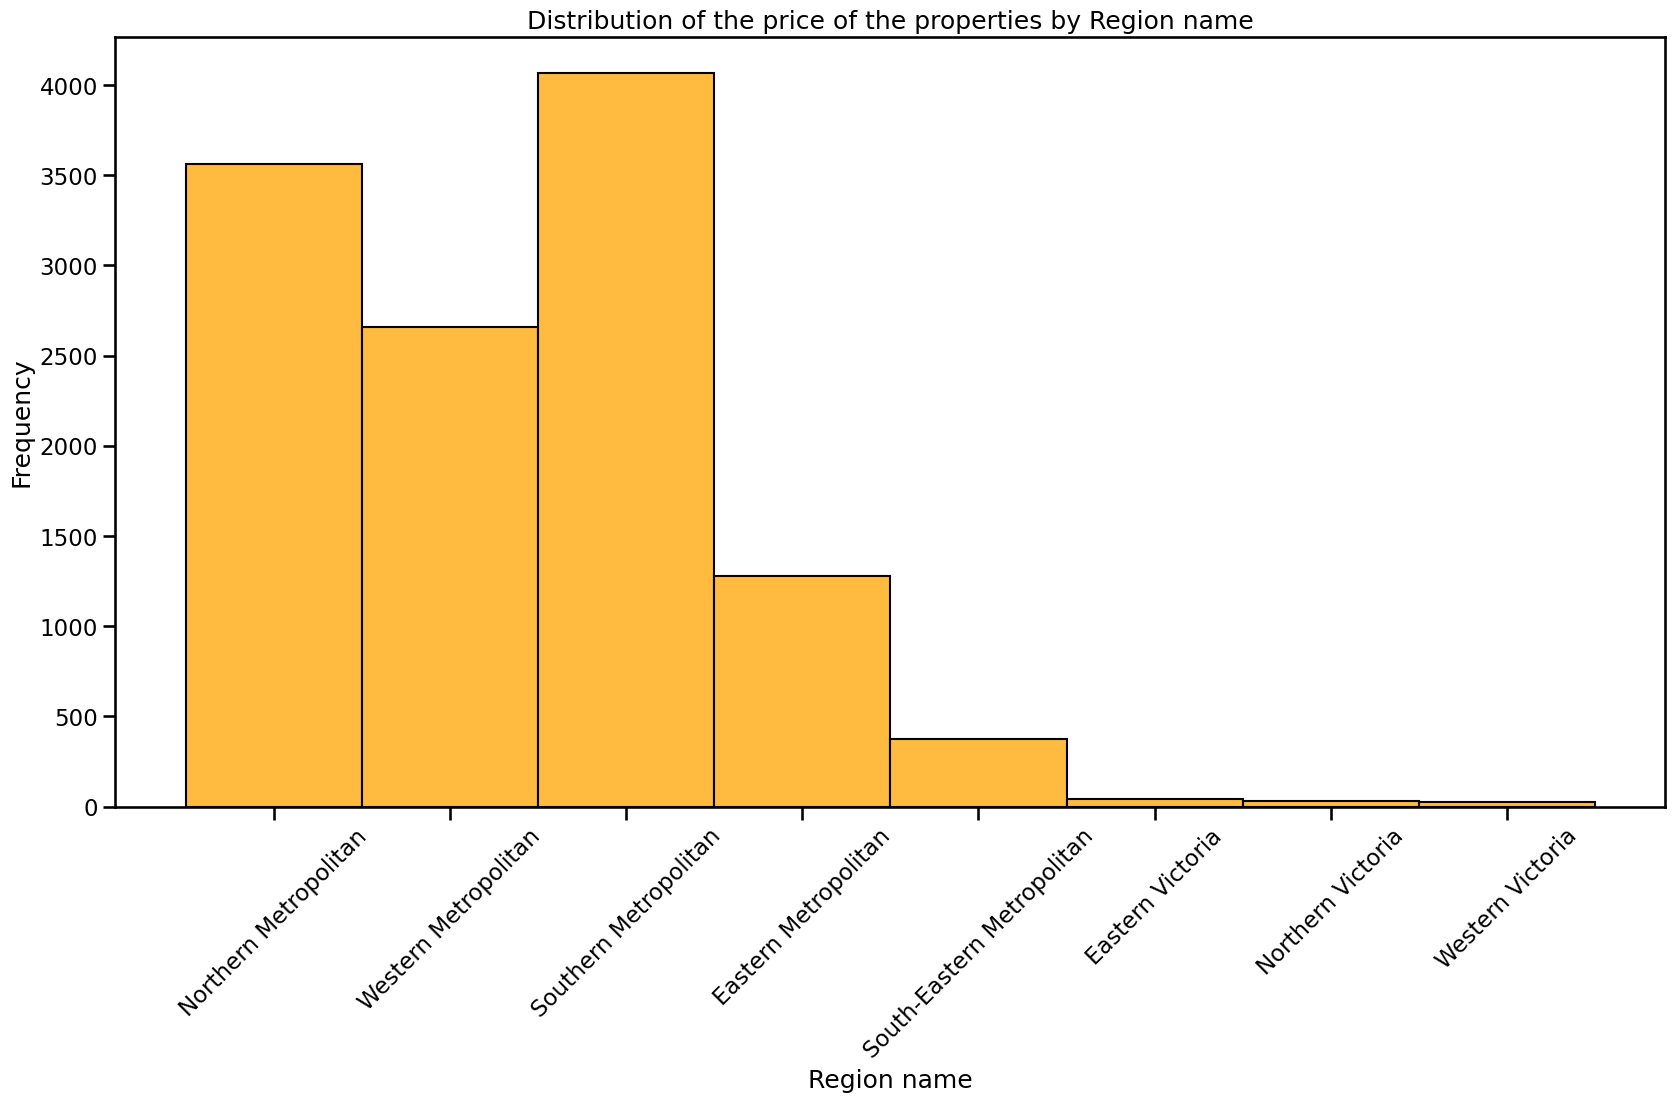

In [27]:
# GRAPH: Distribution of the price of the properties by Region name
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
g = hist_plot(data=df_melb, x='Regionname', title='Distribution of the price of the properties by Region name', \
    xlabel='Region name', ylabel='Frequency', ax=plt.gca())
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

##### Nuevos datos a considerar

Luego, por ello, nos quedan los siguientes datos a considerar:

c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\emanu\anaconda3\envs\diplodatos-avyd\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

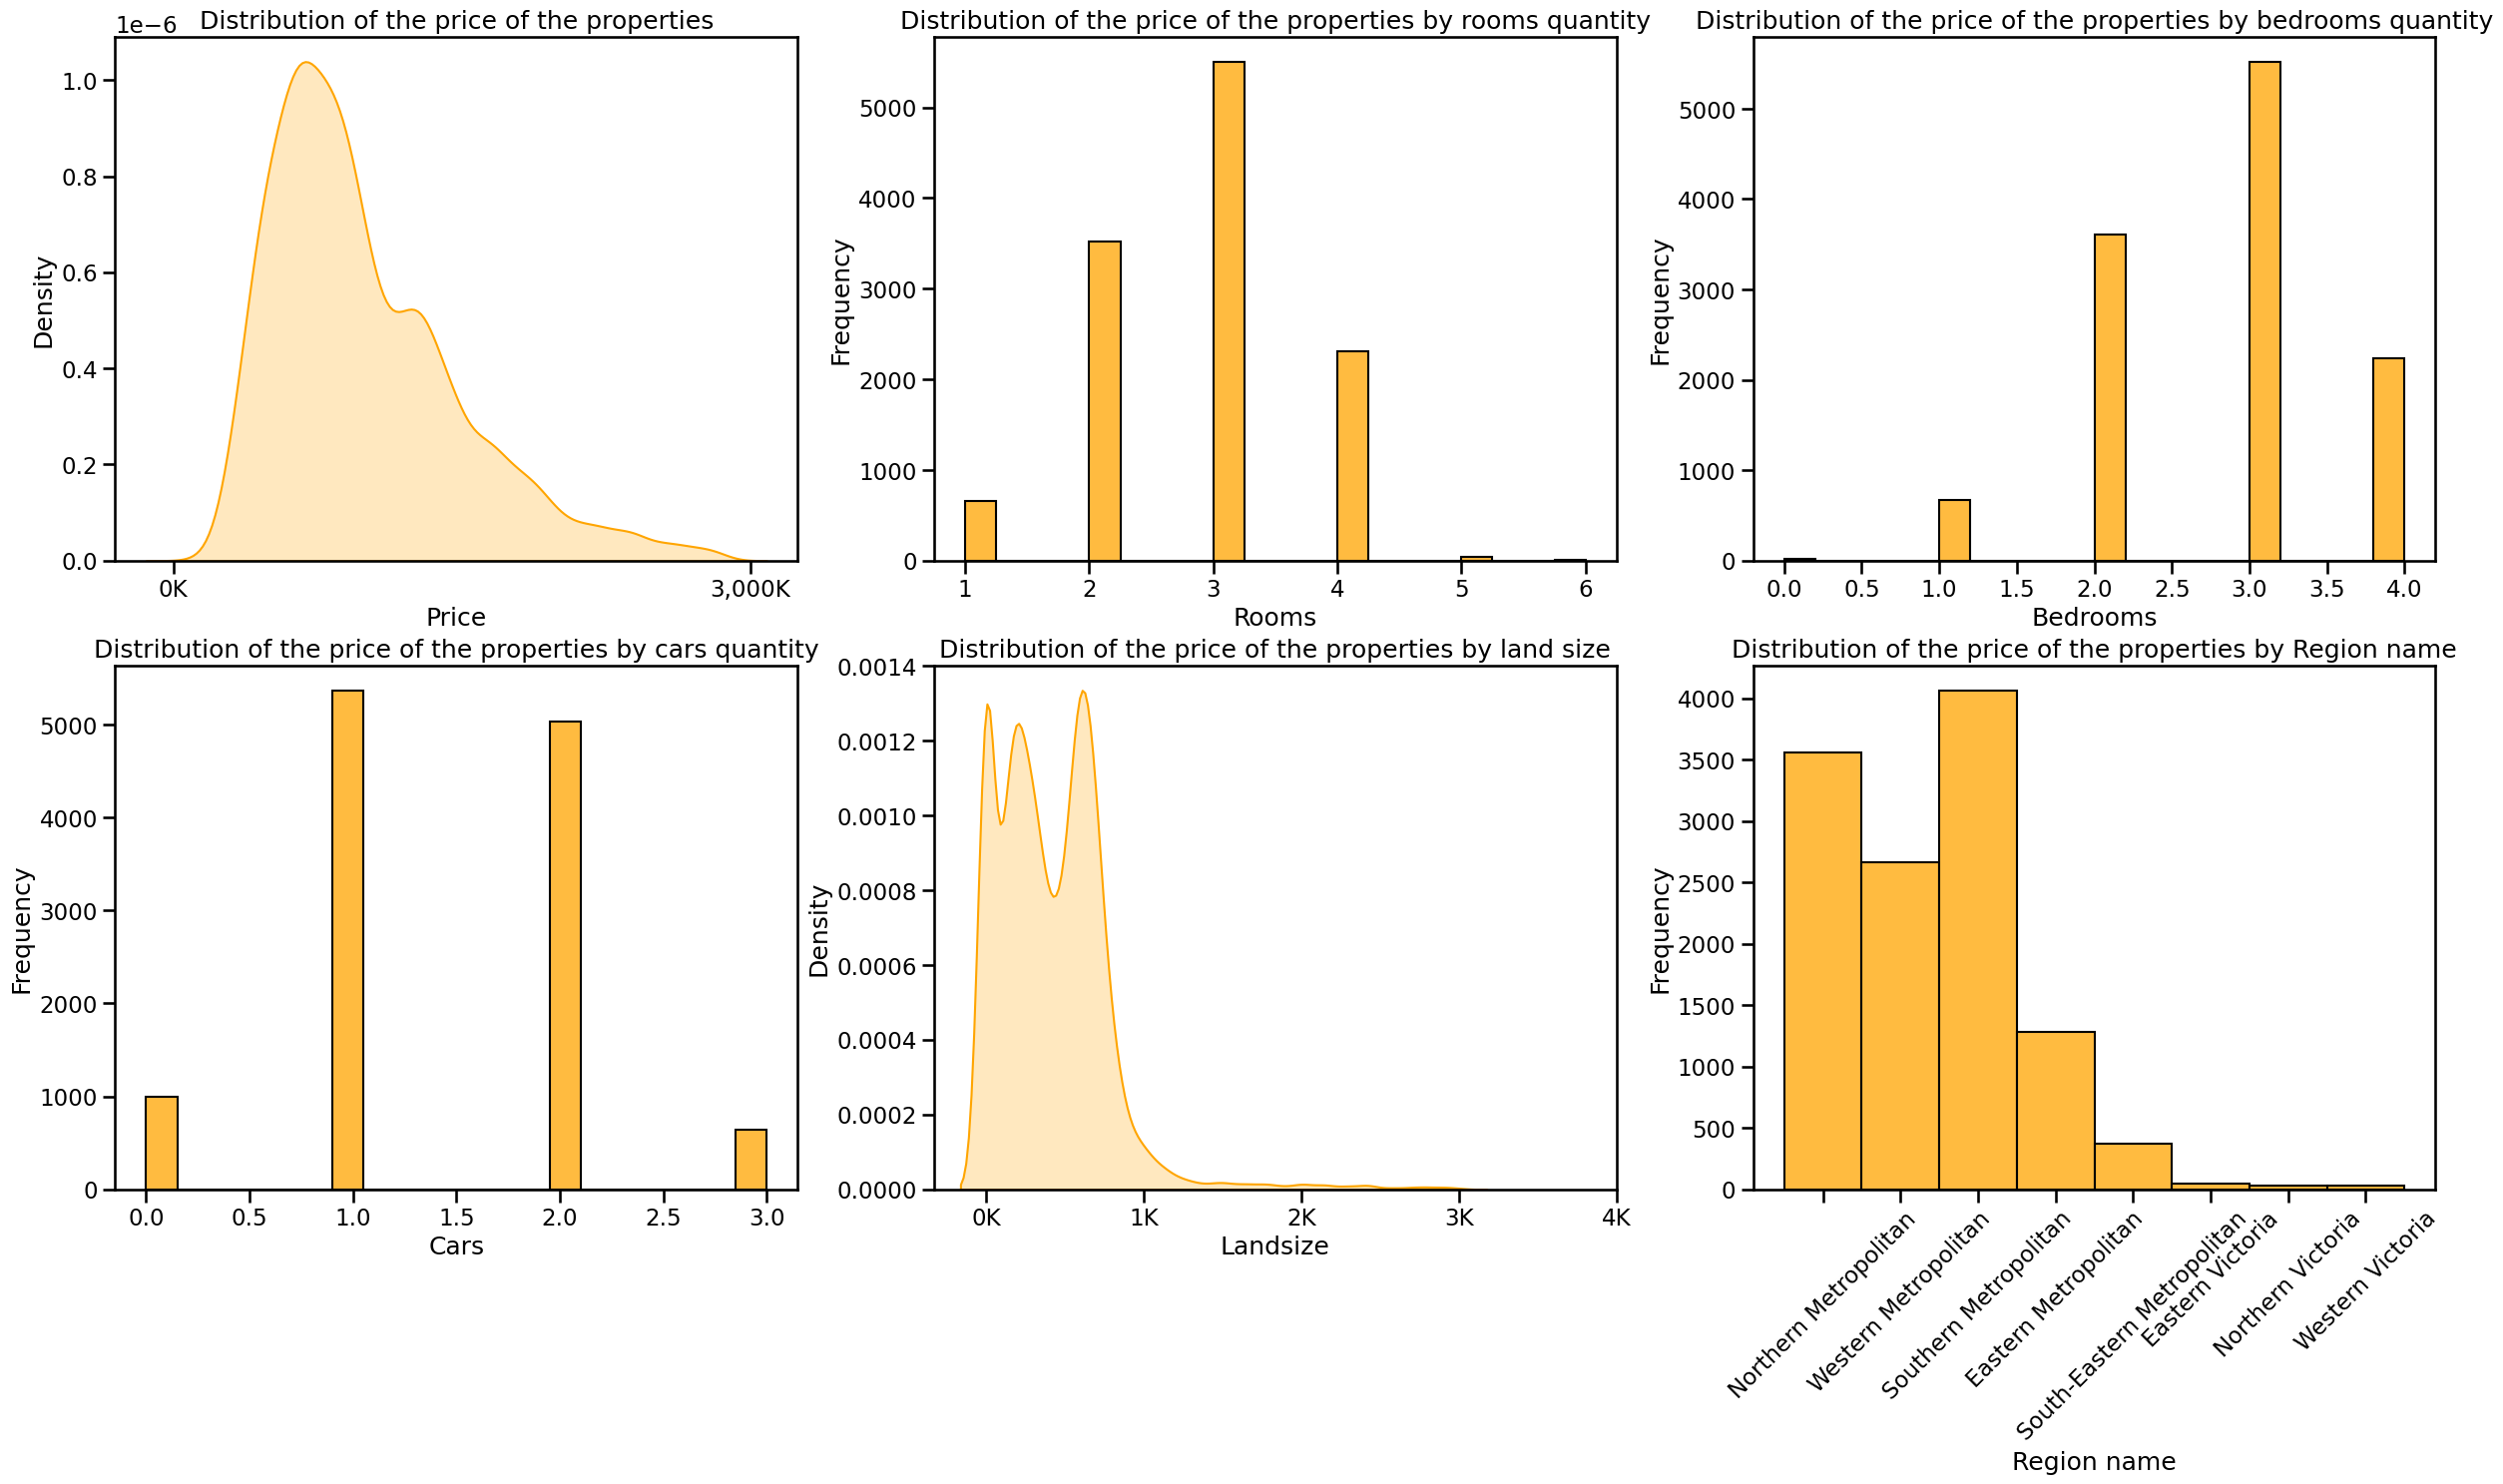

In [28]:
df_melb = df_melb_clean

# GRAPH: All the relevant data distributions
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

# Price
kde_plot(data=df_melb, x='Price', title='Distribution of the price of the properties', \
    xlabel='Price', ax=ax[0, 0], tick_diff=3_000_000)

# Rooms
hist_plot(data=df_melb, x='Rooms', title='Distribution of the price of the properties by rooms quantity', \
    xlabel='Rooms', ylabel='Frequency', ax=ax[0, 1])

# Bedroom2
hist_plot(data=df_melb, x='Bedroom2', title='Distribution of the price of the properties by bedrooms quantity', \
    xlabel='Bedrooms', ylabel='Frequency', ax=ax[0, 2])

# Car
hist_plot(data=df_melb, x='Car', title='Distribution of the price of the properties by cars quantity', \
    xlabel='Cars', ylabel='Frequency', ax=ax[1, 0])

# Landsize
kde_plot(data=df_melb, x='Landsize', title='Distribution of the price of the properties by land size', \
    xlabel='Landsize', ax=ax[1, 1], tick_diff=1_000)

# Regionname
g = hist_plot(data=df_melb, x='Regionname', title='Distribution of the price of the properties by Region name', \
    xlabel='Region name', ylabel='Frequency', ax=ax[1, 2])
g.set_xticklabels(g.get_xticklabels(), rotation=45)

plt.show()

#### 2.2. Análisis, exploración y transformación de los datos

**Consigna**: Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico.
   1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
   2. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
   3. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Al igual que en el punto anterior, primero vamos a analizar los datos faltantes del dataset de *Airbnb* original:

<Axes: >

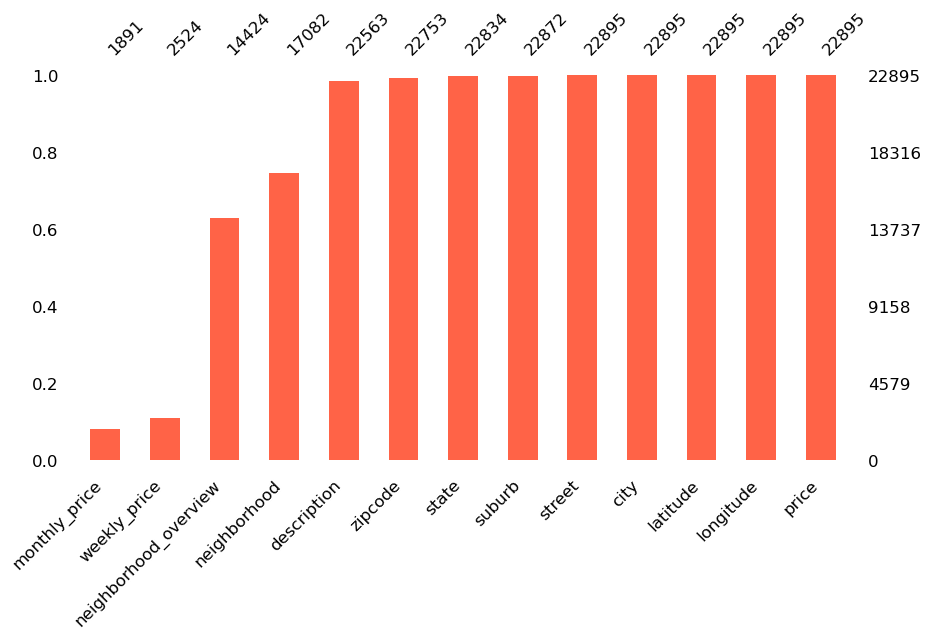

In [29]:
# Missingno bar plot
msno.bar(df=data['airbnb']['df'], color='tomato', sort='ascending', figsize=(10, 5), fontsize=12)


Gracias a ello, podemos ver que, respecto al precio de las casas, únicamente nos interesa la columna *price* dado que los precios mensuales y semanales no nos aportan información relevante para la predicción de los precios de las casas porque tienen una gran cantidad de valores faltantes.

Luego, lo que vamos a considerar para agregar información adicional a nuestro dataset de *Melbourne* son los siguientes datos:
- `mean_price`: Precio promedio de las propiedades en la zona.
- `median_price`: Precio mediano de las propiedades en la zona.
- `min_price`: Precio mínimo de las propiedades en la zona.
- `max_price`: Precio máximo de las propiedades en la zona.

por lo que realizamos las siguientes transformaciones:

In [30]:
# Copy the data
data['airbnb_nw2'] = { 'df': data['airbnb']['df'].copy() }

# Standardize the zipcode data type
data['airbnb_nw2']['df']['zipcode'] = pd.to_numeric(data['airbnb_nw2']['df']['zipcode'], errors='coerce')
data['airbnb_nw2']['df']['zipcode_int'] = data['airbnb_nw2']['df']['zipcode'].fillna(0).astype('int')

# Group the data by zipcode
col = ['price', 'zipcode']
data['airbnb_nw2']['df'] = data['airbnb_nw2']['df'][col].groupby('zipcode')\
    .agg(airbnb_record_count=('price', 'count'),
        airbnb_price_mean=('price', 'mean'),
        airbnb_price_median=('price', 'median'),
        airbnb_price_min=('price', 'min'),
        airbnb_price_max=('price', 'max'))\
    .reset_index()

# Print head of the new table
print("Verifying airbnb_nw2 table")
data['airbnb_nw2']['df'].sample(5)

Verifying airbnb_nw2 table


,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_median,airbnb_price_min,airbnb_price_max
22,3027.0,39,141.641026,71.0,30,2000
17,3020.0,45,69.555556,40.0,22,199
68,3081.0,38,83.657895,59.0,25,453
109,3134.0,56,116.589286,93.0,24,300
106,3131.0,27,112.592593,89.0,29,500


Luego, dado este nuevo dataset, vamos a considerar como "útiles" y "relevantes" para nuestra predicción a aquellos datos que tengan una frecuencia mayor a $30$ en el dataset de *Airbnb*, dado que por el TCL es un número más que suficiente para considerar que la media y la mediana son representativas de la distribución de los datos.

In [31]:
# Filter the data
data['airbnb_nw2']['df'] = data['airbnb_nw2']['df'][data['airbnb_nw2']['df']['airbnb_record_count'] > 30]

# Print head of the new table
print("Verifying airbnb_nw2 table")
data['airbnb_nw2']['df'].sample(5)

Verifying airbnb_nw2 table


,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_median,airbnb_price_min,airbnb_price_max
197,3775.0,45,337.688889,220.0,75,1501
150,3178.0,41,81.878049,69.0,15,278
59,3070.0,284,113.281690,91.0,19,800
43,3051.0,338,112.233728,100.0,0,700
98,3123.0,81,151.296296,101.0,25,1304


Luego, finalmente, lo único que nos queda es unir los datos de ambos datasets para tener un dataset final con el que trabajar.

In [32]:
# Merge the two tables (airbnb_nw2 and melb)
data['full_df'] = { 'df': None }
data['full_df']['df'] = data['melb']['df'].merge(
    data['airbnb_nw2']['df'], how='left', left_on='Postcode', right_on='zipcode'
)

# Print head of the new table
print("Verifying full_df table")
data['full_df']['df'].sample(5)

Verifying full_df table


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Lattitude,Longtitude,Regionname,Propertycount,zipcode,airbnb_record_count,airbnb_price_mean,airbnb_price_median,airbnb_price_min,airbnb_price_max
8027,Keilor East,19 Tuppal Pl,4,h,885000.0,S,Nelson,29/04/2017,12.8,3033.0,...,-37.73170,144.8619,Western Metropolitan,5629.0,NaN,NaN,NaN,NaN,NaN,NaN
1837,Caulfield South,80 Sycamore St,3,h,1170000.0,S,Biggin,8/10/2016,9.3,3162.0,...,-37.88980,145.0196,Southern Metropolitan,5051.0,3162.0,81.0,130.111111,96.0,14.0,465.0
9170,Greenvale,1 Chester Cl,3,h,680000.0,S,Barry,3/06/2017,20.4,3059.0,...,-37.64049,144.8846,Northern Metropolitan,4864.0,NaN,NaN,NaN,NaN,NaN,NaN
8061,Malvern,11/5 Warner St,1,u,456000.0,S,Jellis,6/05/2017,7.4,3144.0,...,-37.85150,145.0372,Southern Metropolitan,4675.0,3144.0,45.0,290.844444,140.0,42.0,1996.0
6678,Yarraville,9 Pearce St,3,h,955000.0,S,Jellis,16/04/2016,7.0,3013.0,...,-37.81960,144.8839,Western Metropolitan,6543.0,3013.0,82.0,135.609756,108.5,25.0,500.0


Por último, y respecto al punto de la consideración de dos nuevas variables para la predicción de datos, consideramos que las variables que implican localización geográfica de la vivienda son *muy importantes* dado que, por lo general, la ubicación es uno de los factores más influyentes (además de las condiciones propias de la casa), en el precio de la propiedad. Por ello mismo, consideramos relevante:
- Saber la zona en la que se encuentra cada propiedad (barrio) y agrupar las propiedades por zonas para predecir el precio de las demás que sean de allí.
- Saber la distancia a la que se encuentra cada propiedad de puntos clave de la ciudad (como el centro, aeropuerto, hospital y escuelas), dado que la cercanía implica mayor comodidad, por lo que esto puede influir en el precio de la propiedad. Para este ítem, nos basaríamos en la *Address* de cada vivienda, o en las coordenadas geográficas de la misma (latitud y longitud).

### Ejercicio 3: Guardar el dataset

**Consigna**: Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

In [33]:
data['full_df']['df'].to_csv('full_melb_airbnb_data.csv', index=False)

### Ejercicios opcionales: ETL + DAG

#### 4.1. Armar un pipeline ETL

**Consigna**: Armar un script en python (archivo .py) [ETL](https://towardsdatascience.com/what-to-log-from-python-etl-pipelines-9e0cfe29950e) que corra los pasos de extracción, transformación y carga, armando una función para cada etapa del proceso y luego un main que corra todos los pasos requeridos.

La resolución de este ejercicio estará basada en los puntos solicitados para el ejercicio 1.

In [34]:
# Logger initialization
log = lg.getLogger(__name__)
log.setLevel(lg.INFO)
lg.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=lg.DEBUG, datefmt='%I:%M:%S')

In [36]:
MELB_URL = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
AIRBNB_URL = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv'
AIRBNB_COLS = ['description', 'neighborhood_overview', 'street', 'neighborhood', 'city', 'suburb', \
                'state', 'zipcode', 'price', 'weekly_price', 'monthly_price', 'latitude', 'longitude']
QUERY = lambda x, y: f"""SELECT {x}, COUNT(*) as Count FROM {y} GROUP BY {x} ORDER BY Count DESC"""
QUERY_LIST = [
    ['Query0', QUERY('CouncilArea', 'melb')],
    ['Query1', QUERY('city', 'airbnb')],
    ['Query2', QUERY('Suburb, CouncilArea', 'melb')],
    ['Query3', QUERY('suburb, city', 'airbnb')]
]

def db_connection() -> db.engine.base.Connection:
    try:
        engine = db.create_engine(url='sqlite:///melb_data_ETL.db', echo=True)
        lg.info("Database connection successful")
        return engine
    except Exception as e:
        lg.error(f"Database connection failed: {e}")
        return None

def data_extraction(file_url: str, columns: list[str] = None) -> pd.DataFrame:
    try:
        df = pd.read_csv(file_url, usecols=columns) if columns else pd.read_csv(file_url)
        lg.info("Data extraction successful")
        return df
    except Exception as e:
        lg.error(f"Data extraction failed: {e}")
        return None

def data_airbnb_transform(df: pd.DataFrame) -> pd.DataFrame:
    try:
        df['zipcode'] = pd.to_numeric(df['zipcode'], errors='coerce')
        df['zipcode_int'] = df['zipcode'].fillna(0).astype('int')

        df = df[['price', 'zipcode']].groupby('zipcode')\
            .agg(airbnb_record_count=('price', 'count'),
                airbnb_price_mean=('price', 'mean'),
                airbnb_price_median=('price', 'median'),
                airbnb_price_min=('price', 'min'),
                airbnb_price_max=('price', 'max'))\
            .reset_index()
        
        df.rename(columns={'suburb': 'airbnb_suburb', 'price': 'airbnb_price'}, inplace=True)
        lg.info("Data transformation successful")
        return df
    except Exception as e:
        lg.error(f"Data transformation failed: {e}")
        return None

def data_loading(conn: db.engine.base.Connection, df: pd.DataFrame, table_name: str) -> bool:
    try:
        df.to_sql(table_name, conn, if_exists='replace')
        lg.info("Data loading successful")
        return True
    except Exception as e:
        lg.error(f"Data loading failed: {e}")
        return False

def data_querying(conn: db.engine.base.Connection, query: str) -> pd.DataFrame:
    try:
        df = pd.read_sql_query(query, conn)
        lg.info("Data querying successful")
        return df
    except Exception as e:
        lg.error(f"Data querying failed: {e}")
        return None

def data_consulting(conn: db.engine.base.Connection) -> None:
    for query in QUERY_LIST:
        q = data_querying(conn=conn, query=query[1])
        data_export(df=q, file_name=f"{query[0]}.csv")

def data_merge(conn: db.engine.base.Connection, left_df: pd.DataFrame, right_df: pd.DataFrame, left_on: str, right_on: str) -> pd.DataFrame:
    try:
        df = left_df.merge(right_df, how='left', left_on=left_on, right_on=right_on)
        lg.info("Data merge successful")
        return df
    except Exception as e:
        lg.error(f"Data merge failed: {e}")
        return None

def data_export(df: pd.DataFrame, file_name: str) -> bool:
    try:
        df.to_csv(file_name, index=False)
        lg.info("Data export successful")
        return True
    except Exception as e:
        lg.error(f"Data export failed: {e}")
        return False

def main():
    lg.info("Starting ETL process")
    conn = db_connection()
    
    melb_df = data_extraction(file_url=MELB_URL)
    airbnb_df = data_extraction(file_url=AIRBNB_URL, columns=AIRBNB_COLS)
    
    data_loading(conn=conn, df=melb_df, table_name='melb')
    data_loading(conn=conn, df=airbnb_df, table_name='airbnb')

    data_consulting(conn=conn)

    airbnb_df = data_airbnb_transform(df=airbnb_df)
    
    full_df = data_merge(conn=conn, left_df=melb_df, right_df=airbnb_df, left_on='Postcode', right_on='zipcode')
    data_loading(conn=conn, df=full_df, table_name='full_df')
    data_export(df=full_df, file_name='full_melb_airbnb_data.csv')

    lg.info("ETL process finished")

if __name__ == '__main__':
    lg.info("Initializing the program")
    main()

10:52:26 INFO:Initializing the program
10:52:26 INFO:Starting ETL process
10:52:26 INFO:Database connection successful
10:52:29 INFO:Data extraction successful
C:\Users\emanu\AppData\Local\Temp\ipykernel_12796\4087328141.py:24: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_url, usecols=columns) if columns else pd.read_csv(file_url)
10:54:37 INFO:Data extraction successful


2024-05-19 10:54:37,904 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:37 INFO:BEGIN (implicit)


2024-05-19 10:54:37,909 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")


10:54:37 INFO:PRAGMA main.table_info("melb")


2024-05-19 10:54:37,910 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,911 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("melb")


10:54:37 INFO:PRAGMA main.table_info("melb")


2024-05-19 10:54:37,912 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,914 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


10:54:37 INFO:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-19 10:54:37,915 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,917 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


10:54:37 INFO:SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-19 10:54:37,918 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,919 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("melb")


10:54:37 INFO:PRAGMA main.table_xinfo("melb")


2024-05-19 10:54:37,920 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,922 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:37 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:37,923 INFO sqlalchemy.engine.Engine [raw sql] ('melb',)


10:54:37 INFO:[raw sql] ('melb',)


2024-05-19 10:54:37,925 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("melb")


10:54:37 INFO:PRAGMA main.foreign_key_list("melb")


2024-05-19 10:54:37,926 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,927 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("melb")


10:54:37 INFO:PRAGMA temp.foreign_key_list("melb")


2024-05-19 10:54:37,928 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,929 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:37 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:37,930 INFO sqlalchemy.engine.Engine [raw sql] ('melb',)


10:54:37 INFO:[raw sql] ('melb',)


2024-05-19 10:54:37,931 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("melb")


10:54:37 INFO:PRAGMA main.index_list("melb")


2024-05-19 10:54:37,933 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,934 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_melb_index")


10:54:37 INFO:PRAGMA main.index_info("ix_melb_index")


2024-05-19 10:54:37,935 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,937 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("melb")


10:54:37 INFO:PRAGMA main.index_list("melb")


2024-05-19 10:54:37,938 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,939 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_melb_index")


10:54:37 INFO:PRAGMA main.index_info("ix_melb_index")


2024-05-19 10:54:37,940 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:37 INFO:[raw sql] ()


2024-05-19 10:54:37,942 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:37 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:37,943 INFO sqlalchemy.engine.Engine [raw sql] ('melb',)


10:54:37 INFO:[raw sql] ('melb',)


2024-05-19 10:54:37,946 INFO sqlalchemy.engine.Engine 
DROP TABLE melb


10:54:37 INFO:
DROP TABLE melb


2024-05-19 10:54:37,947 INFO sqlalchemy.engine.Engine [no key 0.00116s] ()


10:54:37 INFO:[no key 0.00116s] ()


2024-05-19 10:54:37,960 INFO sqlalchemy.engine.Engine 
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




10:54:37 INFO:
CREATE TABLE melb (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT
)




2024-05-19 10:54:37,961 INFO sqlalchemy.engine.Engine [no key 0.00165s] ()


10:54:37 INFO:[no key 0.00165s] ()


2024-05-19 10:54:37,969 INFO sqlalchemy.engine.Engine CREATE INDEX ix_melb_index ON melb ("index")


10:54:37 INFO:CREATE INDEX ix_melb_index ON melb ("index")


2024-05-19 10:54:37,970 INFO sqlalchemy.engine.Engine [no key 0.00133s] ()


10:54:37 INFO:[no key 0.00133s] ()


2024-05-19 10:54:38,194 INFO sqlalchemy.engine.Engine INSERT INTO melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


10:54:38 INFO:INSERT INTO melb ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount") VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-19 10:54:38,195 INFO sqlalchemy.engine.Engine [generated in 0.16594s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8

10:54:38 INFO:[generated in 0.16594s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0), (4, 'Abbotsford', '55a Park St', 4, 'h', 1600000.0, 'VB', 'Nelson', '4/06/2016', 2.5, 3067.0, 3.0, 1.0, 2.0, 120.0, 142.0, 2014.0, 'Yarra', -37.8072, 144.9941, 'Northern Metropolitan', 

2024-05-19 10:54:38,285 INFO sqlalchemy.engine.Engine COMMIT


10:54:38 INFO:COMMIT
10:54:38 INFO:Data loading successful


2024-05-19 10:54:38,300 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:38 INFO:BEGIN (implicit)


2024-05-19 10:54:38,307 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


10:54:38 INFO:PRAGMA main.table_info("airbnb")


2024-05-19 10:54:38,311 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,313 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("airbnb")


10:54:38 INFO:PRAGMA main.table_info("airbnb")


2024-05-19 10:54:38,314 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,316 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


10:54:38 INFO:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-19 10:54:38,317 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,319 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


10:54:38 INFO:SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-19 10:54:38,320 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,322 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("airbnb")


10:54:38 INFO:PRAGMA main.table_xinfo("airbnb")


2024-05-19 10:54:38,323 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,325 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:38 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:38,327 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)


10:54:38 INFO:[raw sql] ('airbnb',)


2024-05-19 10:54:38,329 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("airbnb")


10:54:38 INFO:PRAGMA main.foreign_key_list("airbnb")


2024-05-19 10:54:38,329 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,331 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("airbnb")


10:54:38 INFO:PRAGMA temp.foreign_key_list("airbnb")


2024-05-19 10:54:38,332 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,333 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:38 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:38,334 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)


10:54:38 INFO:[raw sql] ('airbnb',)


2024-05-19 10:54:38,336 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb")


10:54:38 INFO:PRAGMA main.index_list("airbnb")


2024-05-19 10:54:38,337 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,339 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_index")


10:54:38 INFO:PRAGMA main.index_info("ix_airbnb_index")


2024-05-19 10:54:38,340 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,342 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("airbnb")


10:54:38 INFO:PRAGMA main.index_list("airbnb")


2024-05-19 10:54:38,343 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,345 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_airbnb_index")


10:54:38 INFO:PRAGMA main.index_info("ix_airbnb_index")


2024-05-19 10:54:38,346 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:38 INFO:[raw sql] ()


2024-05-19 10:54:38,348 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:38 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:38,348 INFO sqlalchemy.engine.Engine [raw sql] ('airbnb',)


10:54:38 INFO:[raw sql] ('airbnb',)


2024-05-19 10:54:38,351 INFO sqlalchemy.engine.Engine 
DROP TABLE airbnb


10:54:38 INFO:
DROP TABLE airbnb


2024-05-19 10:54:38,354 INFO sqlalchemy.engine.Engine [no key 0.00266s] ()


10:54:38 INFO:[no key 0.00266s] ()


2024-05-19 10:54:38,363 INFO sqlalchemy.engine.Engine 
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




10:54:38 INFO:
CREATE TABLE airbnb (
	"index" BIGINT, 
	description TEXT, 
	neighborhood_overview TEXT, 
	street TEXT, 
	neighborhood TEXT, 
	city TEXT, 
	suburb TEXT, 
	state TEXT, 
	zipcode TEXT, 
	latitude FLOAT, 
	longitude FLOAT, 
	price BIGINT, 
	weekly_price FLOAT, 
	monthly_price FLOAT
)




2024-05-19 10:54:38,364 INFO sqlalchemy.engine.Engine [no key 0.00176s] ()


10:54:38 INFO:[no key 0.00176s] ()


2024-05-19 10:54:38,372 INFO sqlalchemy.engine.Engine CREATE INDEX ix_airbnb_index ON airbnb ("index")


10:54:38 INFO:CREATE INDEX ix_airbnb_index ON airbnb ("index")


2024-05-19 10:54:38,373 INFO sqlalchemy.engine.Engine [no key 0.00143s] ()


10:54:38 INFO:[no key 0.00143s] ()


2024-05-19 10:54:38,626 INFO sqlalchemy.engine.Engine INSERT INTO airbnb ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


10:54:38 INFO:INSERT INTO airbnb ("index", description, neighborhood_overview, street, neighborhood, city, suburb, state, zipcode, latitude, longitude, price, weekly_price, monthly_price) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-19 10:54:38,628 INFO sqlalchemy.engine.Engine [generated in 0.17486s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural stri

10:54:38 INFO:[generated in 0.17486s] [(0, 'House: Clean, New, Modern, Quite, Safe. 10Km from the City. Golf course, Tennis courts, bus stop & shops walking distance!! Rooms: Contains one queen ... (702 characters truncated) ... pproximately what your daily in and out hours might look like.  Note: There is a 5 year old fun loving dog who lives with us and is part of our famil', 'Very safe! Family oriented. Older age group.', 'Bulleen, VIC, Australia', 'Balwyn North', 'Manningham', 'Bulleen', 'VIC', '3105', -37.77268393, 145.0921328, 60, None, None), (1, "A large air conditioned room with queen spring mattress bed in a vintage apartment. Located right outside is a tram to the city just 19 minutes away. ... (702 characters truncated) ... ou east to Bundoora and west to Pacoevale. The Lygon Street tram line that goes past Melbourne University is 10 minutes walk west and Sydney Road and", "This hip area is a crossroads between two great cultural strips of inner Northern Melbourne.  Located

2024-05-19 10:54:38,867 INFO sqlalchemy.engine.Engine COMMIT


10:54:38 INFO:COMMIT
10:54:39 INFO:Data loading successful


2024-05-19 10:54:39,095 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:39 INFO:BEGIN (implicit)


2024-05-19 10:54:39,096 INFO sqlalchemy.engine.Engine SELECT CouncilArea, COUNT(*) as Count FROM melb GROUP BY CouncilArea ORDER BY Count DESC


10:54:39 INFO:SELECT CouncilArea, COUNT(*) as Count FROM melb GROUP BY CouncilArea ORDER BY Count DESC


2024-05-19 10:54:39,097 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,108 INFO sqlalchemy.engine.Engine ROLLBACK


10:54:39 INFO:ROLLBACK
10:54:39 INFO:Data querying successful
10:54:39 INFO:Data export successful


2024-05-19 10:54:39,111 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:39 INFO:BEGIN (implicit)


2024-05-19 10:54:39,112 INFO sqlalchemy.engine.Engine SELECT city, COUNT(*) as Count FROM airbnb GROUP BY city ORDER BY Count DESC


10:54:39 INFO:SELECT city, COUNT(*) as Count FROM airbnb GROUP BY city ORDER BY Count DESC


2024-05-19 10:54:39,113 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,160 INFO sqlalchemy.engine.Engine ROLLBACK


10:54:39 INFO:ROLLBACK
10:54:39 INFO:Data querying successful
10:54:39 INFO:Data export successful


2024-05-19 10:54:39,164 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:39 INFO:BEGIN (implicit)


2024-05-19 10:54:39,165 INFO sqlalchemy.engine.Engine SELECT Suburb, CouncilArea, COUNT(*) as Count FROM melb GROUP BY Suburb, CouncilArea ORDER BY Count DESC


10:54:39 INFO:SELECT Suburb, CouncilArea, COUNT(*) as Count FROM melb GROUP BY Suburb, CouncilArea ORDER BY Count DESC


2024-05-19 10:54:39,166 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,181 INFO sqlalchemy.engine.Engine ROLLBACK


10:54:39 INFO:ROLLBACK
10:54:39 INFO:Data querying successful
10:54:39 INFO:Data export successful


2024-05-19 10:54:39,186 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:39 INFO:BEGIN (implicit)


2024-05-19 10:54:39,187 INFO sqlalchemy.engine.Engine SELECT suburb, city, COUNT(*) as Count FROM airbnb GROUP BY suburb, city ORDER BY Count DESC


10:54:39 INFO:SELECT suburb, city, COUNT(*) as Count FROM airbnb GROUP BY suburb, city ORDER BY Count DESC


2024-05-19 10:54:39,188 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,249 INFO sqlalchemy.engine.Engine ROLLBACK


10:54:39 INFO:ROLLBACK
10:54:39 INFO:Data querying successful
10:54:39 INFO:Data export successful
10:54:39 INFO:Data transformation successful
10:54:39 INFO:Data merge successful


2024-05-19 10:54:39,282 INFO sqlalchemy.engine.Engine BEGIN (implicit)


10:54:39 INFO:BEGIN (implicit)


2024-05-19 10:54:39,286 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("full_df")


10:54:39 INFO:PRAGMA main.table_info("full_df")


2024-05-19 10:54:39,288 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,290 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("full_df")


10:54:39 INFO:PRAGMA main.table_info("full_df")


2024-05-19 10:54:39,291 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,293 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


10:54:39 INFO:SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-19 10:54:39,294 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,295 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


10:54:39 INFO:SELECT name FROM sqlite_master WHERE type='view' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name


2024-05-19 10:54:39,296 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,297 INFO sqlalchemy.engine.Engine PRAGMA main.table_xinfo("full_df")


10:54:39 INFO:PRAGMA main.table_xinfo("full_df")


2024-05-19 10:54:39,298 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,300 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:39 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:39,301 INFO sqlalchemy.engine.Engine [raw sql] ('full_df',)


10:54:39 INFO:[raw sql] ('full_df',)


2024-05-19 10:54:39,302 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("full_df")


10:54:39 INFO:PRAGMA main.foreign_key_list("full_df")


2024-05-19 10:54:39,303 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,304 INFO sqlalchemy.engine.Engine PRAGMA temp.foreign_key_list("full_df")


10:54:39 INFO:PRAGMA temp.foreign_key_list("full_df")


2024-05-19 10:54:39,305 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,307 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:39 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:39,308 INFO sqlalchemy.engine.Engine [raw sql] ('full_df',)


10:54:39 INFO:[raw sql] ('full_df',)


2024-05-19 10:54:39,311 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("full_df")


10:54:39 INFO:PRAGMA main.index_list("full_df")


2024-05-19 10:54:39,312 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,313 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_full_df_index")


10:54:39 INFO:PRAGMA main.index_info("ix_full_df_index")


2024-05-19 10:54:39,314 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,316 INFO sqlalchemy.engine.Engine PRAGMA main.index_list("full_df")


10:54:39 INFO:PRAGMA main.index_list("full_df")


2024-05-19 10:54:39,317 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,318 INFO sqlalchemy.engine.Engine PRAGMA main.index_info("ix_full_df_index")


10:54:39 INFO:PRAGMA main.index_info("ix_full_df_index")


2024-05-19 10:54:39,319 INFO sqlalchemy.engine.Engine [raw sql] ()


10:54:39 INFO:[raw sql] ()


2024-05-19 10:54:39,321 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


10:54:39 INFO:SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type in ('table', 'view')


2024-05-19 10:54:39,322 INFO sqlalchemy.engine.Engine [raw sql] ('full_df',)


10:54:39 INFO:[raw sql] ('full_df',)


2024-05-19 10:54:39,326 INFO sqlalchemy.engine.Engine 
DROP TABLE full_df


10:54:39 INFO:
DROP TABLE full_df


2024-05-19 10:54:39,327 INFO sqlalchemy.engine.Engine [no key 0.00110s] ()


10:54:39 INFO:[no key 0.00110s] ()


2024-05-19 10:54:39,338 INFO sqlalchemy.engine.Engine 
CREATE TABLE full_df (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT, 
	zipcode FLOAT, 
	airbnb_record_count FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_price_median FLOAT, 
	airbnb_price_min FLOAT, 
	airbnb_price_max FLOAT
)




10:54:39 INFO:
CREATE TABLE full_df (
	"index" BIGINT, 
	"Suburb" TEXT, 
	"Address" TEXT, 
	"Rooms" BIGINT, 
	"Type" TEXT, 
	"Price" FLOAT, 
	"Method" TEXT, 
	"SellerG" TEXT, 
	"Date" TEXT, 
	"Distance" FLOAT, 
	"Postcode" FLOAT, 
	"Bedroom2" FLOAT, 
	"Bathroom" FLOAT, 
	"Car" FLOAT, 
	"Landsize" FLOAT, 
	"BuildingArea" FLOAT, 
	"YearBuilt" FLOAT, 
	"CouncilArea" TEXT, 
	"Lattitude" FLOAT, 
	"Longtitude" FLOAT, 
	"Regionname" TEXT, 
	"Propertycount" FLOAT, 
	zipcode FLOAT, 
	airbnb_record_count FLOAT, 
	airbnb_price_mean FLOAT, 
	airbnb_price_median FLOAT, 
	airbnb_price_min FLOAT, 
	airbnb_price_max FLOAT
)




2024-05-19 10:54:39,340 INFO sqlalchemy.engine.Engine [no key 0.00109s] ()


10:54:39 INFO:[no key 0.00109s] ()


2024-05-19 10:54:39,348 INFO sqlalchemy.engine.Engine CREATE INDEX ix_full_df_index ON full_df ("index")


10:54:39 INFO:CREATE INDEX ix_full_df_index ON full_df ("index")


2024-05-19 10:54:39,349 INFO sqlalchemy.engine.Engine [no key 0.00112s] ()


10:54:39 INFO:[no key 0.00112s] ()


2024-05-19 10:54:39,725 INFO sqlalchemy.engine.Engine INSERT INTO full_df ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount", zipcode, airbnb_record_count, airbnb_price_mean, airbnb_price_median, airbnb_price_min, airbnb_price_max) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


10:54:39 INFO:INSERT INTO full_df ("index", "Suburb", "Address", "Rooms", "Type", "Price", "Method", "SellerG", "Date", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "CouncilArea", "Lattitude", "Longtitude", "Regionname", "Propertycount", zipcode, airbnb_record_count, airbnb_price_mean, airbnb_price_median, airbnb_price_min, airbnb_price_max) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)


2024-05-19 10:54:39,726 INFO sqlalchemy.engine.Engine [generated in 0.30832s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62403100775194, 100.0, 28.0, 900.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62403100775194, 100.0, 28.0, 900.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62403100775194, 100.0, 28.0, 900.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metr

10:54:39 INFO:[generated in 0.30832s] [(0, 'Abbotsford', '85 Turner St', 2, 'h', 1480000.0, 'S', 'Biggin', '3/12/2016', 2.5, 3067.0, 2.0, 1.0, 1.0, 202.0, None, None, 'Yarra', -37.7996, 144.9984, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62403100775194, 100.0, 28.0, 900.0), (1, 'Abbotsford', '25 Bloomburg St', 2, 'h', 1035000.0, 'S', 'Biggin', '4/02/2016', 2.5, 3067.0, 2.0, 1.0, 0.0, 156.0, 79.0, 1900.0, 'Yarra', -37.8079, 144.9934, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62403100775194, 100.0, 28.0, 900.0), (2, 'Abbotsford', '5 Charles St', 3, 'h', 1465000.0, 'SP', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 0.0, 134.0, 150.0, 1900.0, 'Yarra', -37.8093, 144.9944, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62403100775194, 100.0, 28.0, 900.0), (3, 'Abbotsford', '40 Federation La', 3, 'h', 850000.0, 'PI', 'Biggin', '4/03/2017', 2.5, 3067.0, 3.0, 2.0, 1.0, 94.0, None, None, 'Yarra', -37.7969, 144.9969, 'Northern Metropolitan', 4019.0, 3067.0, 258.0, 130.62

2024-05-19 10:54:39,831 INFO sqlalchemy.engine.Engine COMMIT


10:54:39 INFO:COMMIT
10:54:39 INFO:Data loading successful
10:54:40 INFO:Data export successful
10:54:40 INFO:ETL process finished


#### 4.2. Definir un DAG

**Consigna**: Armar un DAG en Apache Airflow que corra el ETL. (https://airflow.apache.org/docs/apache-airflow/stable/tutorial.html)